In [0]:
!pip install geopandas==0.3.0
!pip install pyshp==1.2.10
!pip install shapely==1.6.3
!pip install plotly-geo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import plotly
import plotly.figure_factory as ff
import matplotlib.animation as animation
import json
%matplotlib inline

     |████████████████████████████████| 890kB 2.8MB/s 
     |████████████████████████████████| 14.7MB 275kB/s 
     |████████████████████████████████| 10.4MB 48.7MB/s 
     |████████████████████████████████| 184kB 2.7MB/s 
  Created wheel for pyshp: filename=pyshp-1.2.10-cp36-none-any.whl size=20467 sha256=c7301d259836a3da5460b4a2e02b868d511282c0f013939592408a7d3c32c6e4
  Stored in directory: /root/.cache/pip/wheels/ba/1a/67/6a12977f362c33a15edc753daf92c6f01879dbf4db76faf0dd
Successfully built pyshp
     |████████████████████████████████| 1.5MB 2.7MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Shapely 1.7.0
    Uninstalling Shapely-1.7.0:
      Successfully uninstalled Shapely-1.7.0
     |████████████████████████████████| 23.7MB 1.5MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# read files

In [ ]:
def read_all_csv(years):
    df = pd.DataFrame()
    for file_name in years:
        if 'csv' in file_name:
            yearly_data = pd.DataFrame()
            yearly_data = pd.read_csv(file_name)
            df = df.append(yearly_data)
    return df

In [0]:
years = os.listdir()
data = read_all_csv(years)
data.sort_values('Year', ascending =False, inplace= True)
data = data[~data['State'].isin(['Country Of Mexico', 'Canada', 'Virgin Islands'])]

['.ipynb_checkpoints', 'annual_aqi_by_county_2000.csv', 'annual_aqi_by_county_2001.csv', 'annual_aqi_by_county_2002.csv', 'annual_aqi_by_county_2003.csv', 'annual_aqi_by_county_2004.csv', 'annual_aqi_by_county_2005.csv', 'annual_aqi_by_county_2006.csv', 'annual_aqi_by_county_2007.csv', 'annual_aqi_by_county_2008.csv', 'annual_aqi_by_county_2009.csv', 'annual_aqi_by_county_2010.csv', 'annual_aqi_by_county_2012.csv', 'annual_aqi_by_county_2011.csv', 'annual_aqi_by_county_2013.csv', 'annual_aqi_by_county_2014.csv', 'annual_aqi_by_county_2015.csv', 'annual_aqi_by_county_2016.csv', 'annual_aqi_by_county_2017.csv', 'annual_aqi_by_county_2018.csv', '2019_Gaz_counties_national.txt', 'Incubator.ipynb', 'Untitled.ipynb', 'Copy of all-geocodes-v2016.csv', 'sf1.json', 'Images', 'Incubator2.ipynb']
(64871, 26)
(64759, 26)


# Get FIPS codes

In [ ]:
data2 = []
with open('./sf1.json') as f:
    data2 = json.load(f)
del data2[0]
fips_codes = {}
for item in data2:
    [county, state] = item[0].split(',')
    county = county.strip().lower()
    state = state.strip().lower()
    if not fips_codes.get(state):
        fips_codes[state] = {}
    fips_codes[state][county.split(' county')[0]] = item[1] + item[2]

# Unhealthy days for sensitive groups 

In [0]:
df = pd.pivot_table(data,values='Unhealthy for Sensitive Groups Days', index='Year', 
                     columns=['State', 'County'])
df = df.dropna(axis='columns')
df.head()

State  Alabama                       ...  Wyoming                          
County Baldwin  Clay Colbert DeKalb  ... Sheridan Sublette Sweetwater Teton
Year                                 ...                                   
2000.0    39.0  14.0     7.0   58.0  ...      4.0      8.0        0.0   0.0
2001.0    12.0  14.0     6.0   28.0  ...      4.0      2.0        2.0   0.0
2002.0     4.0  17.0    14.0   24.0  ...      1.0      5.0        4.0   0.0
2003.0    11.0   9.0     8.0   11.0  ...      0.0      3.0        9.0   1.0
2004.0    15.0   4.0     1.0    7.0  ...      5.0      0.0        1.0   0.0

[5 rows x 859 columns]

In [0]:
states = df.columns.levels[0]

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District Of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='State')


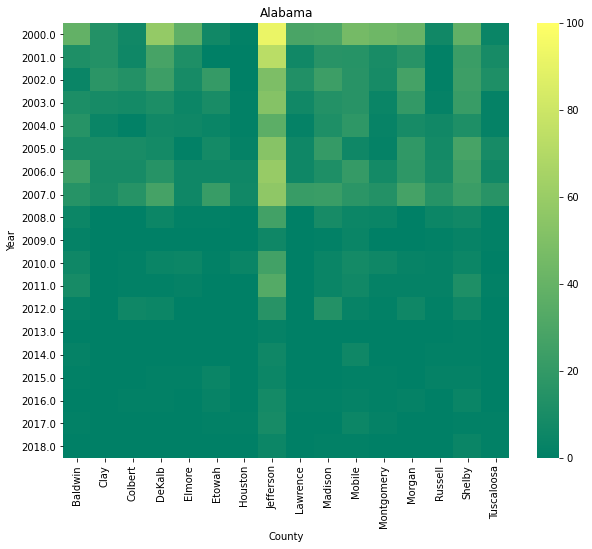

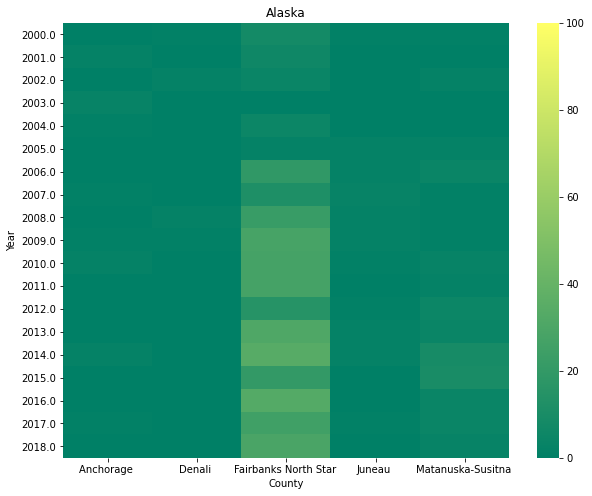

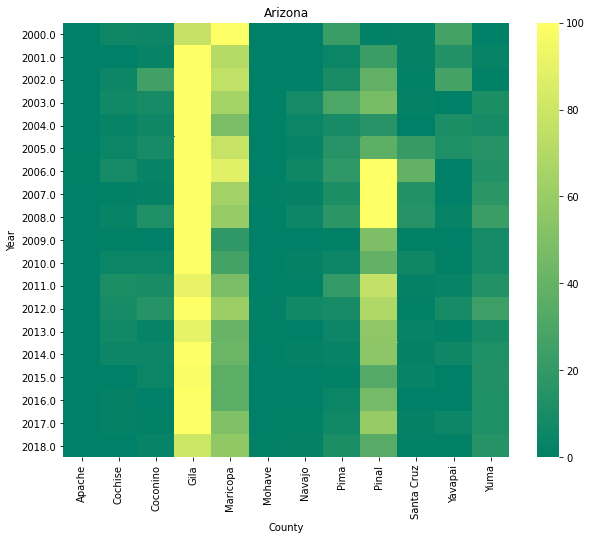

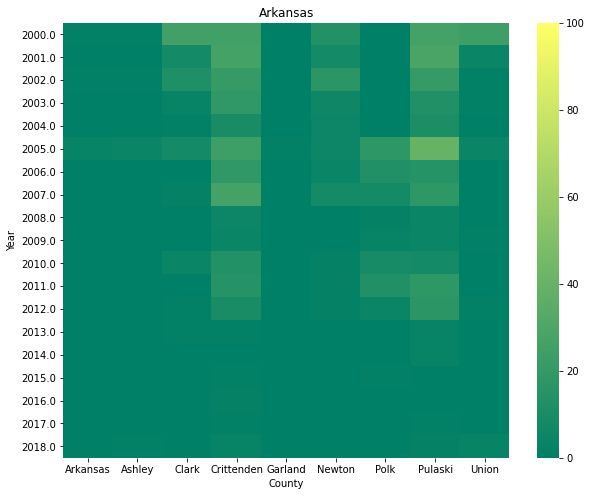

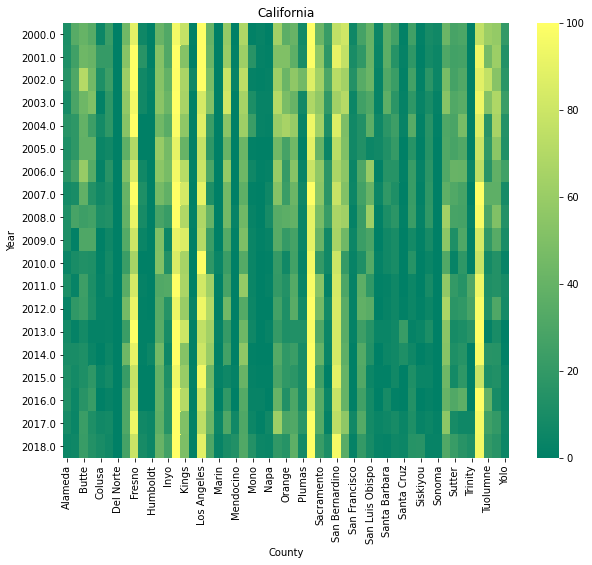

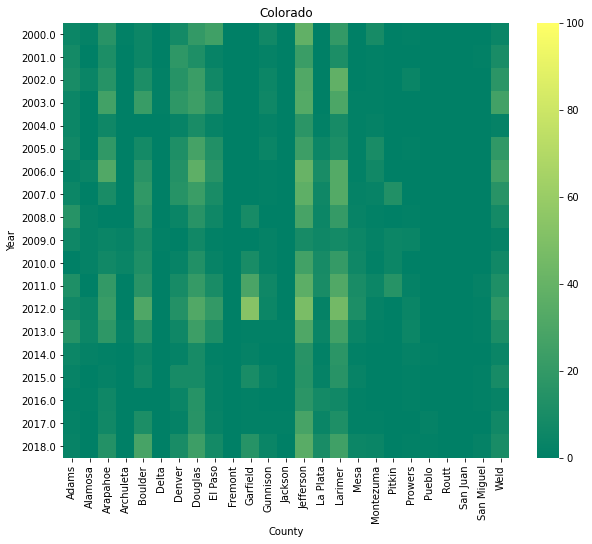

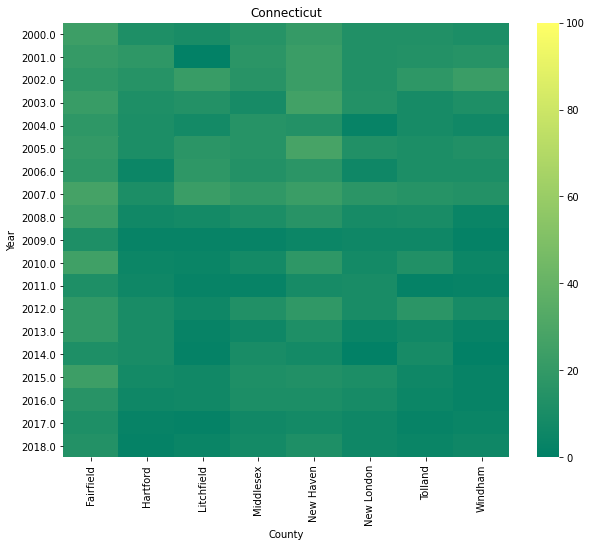

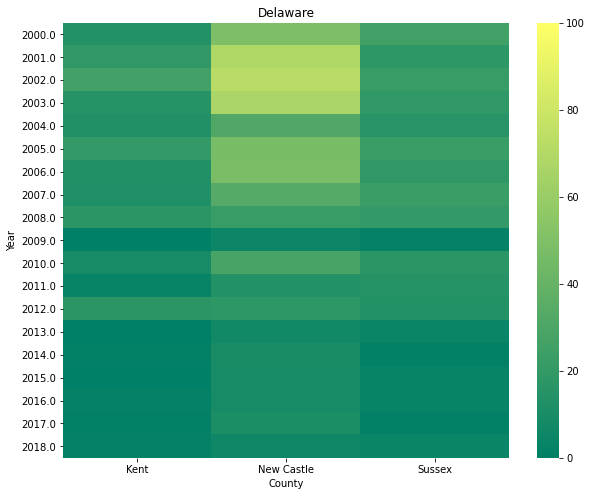

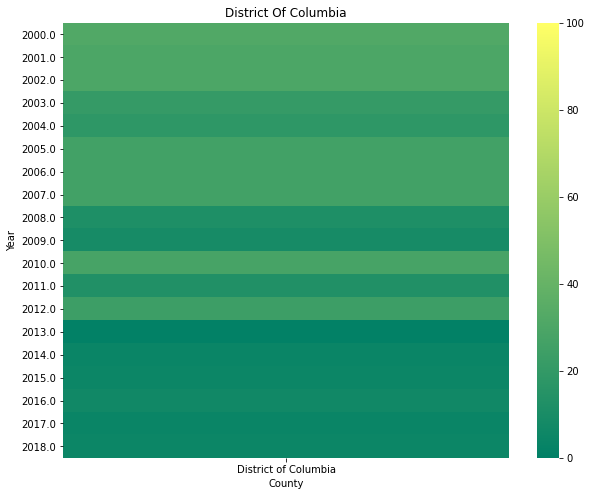

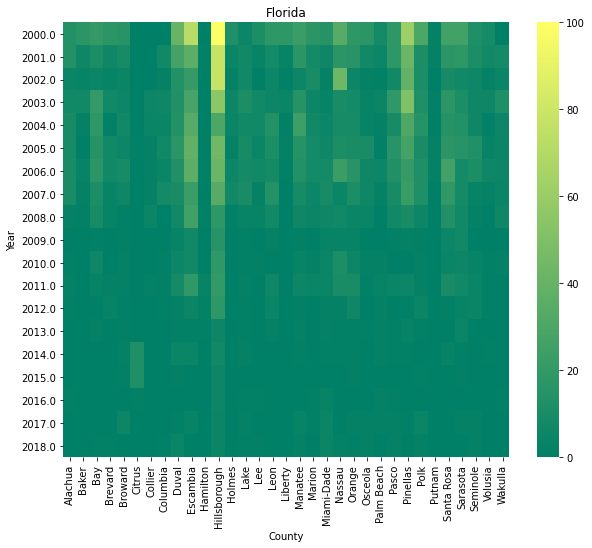

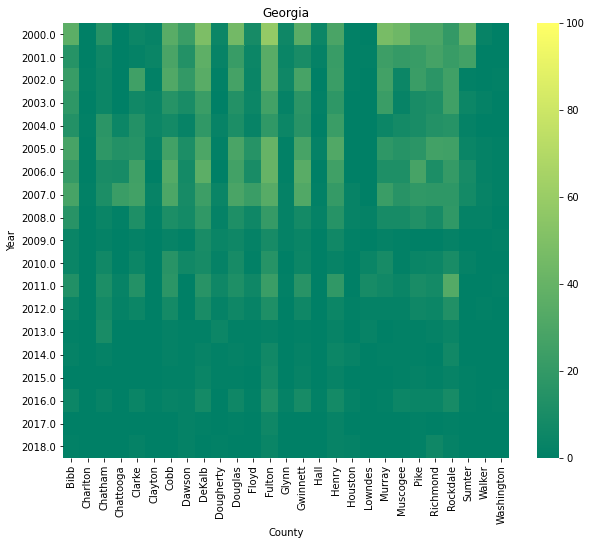

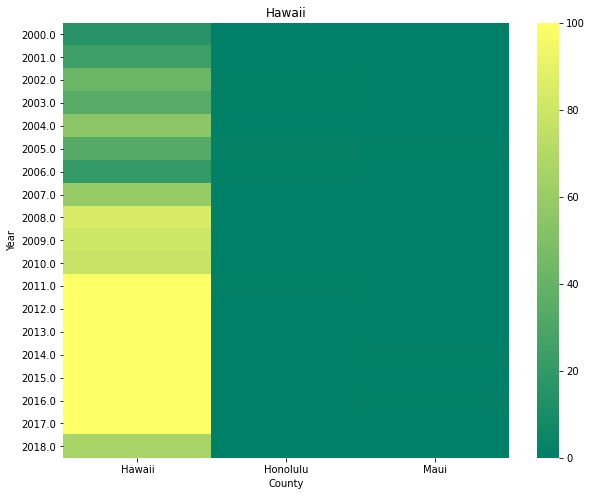

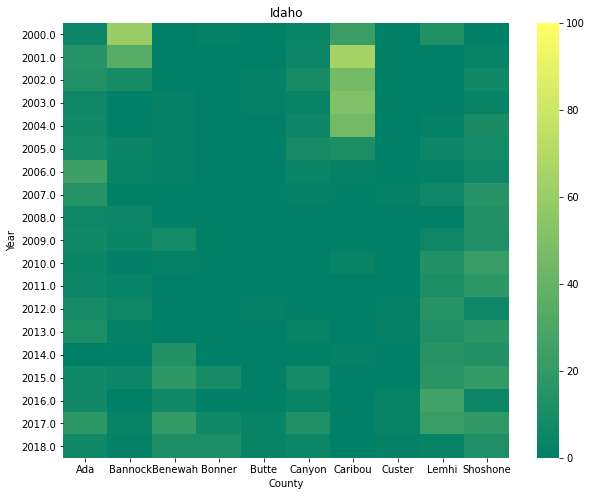

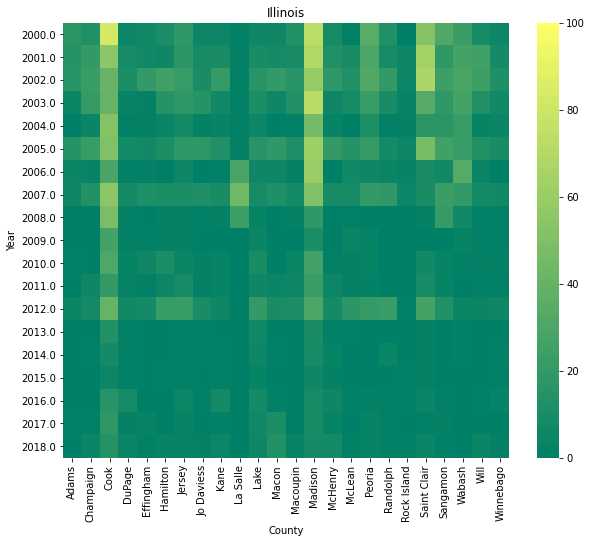

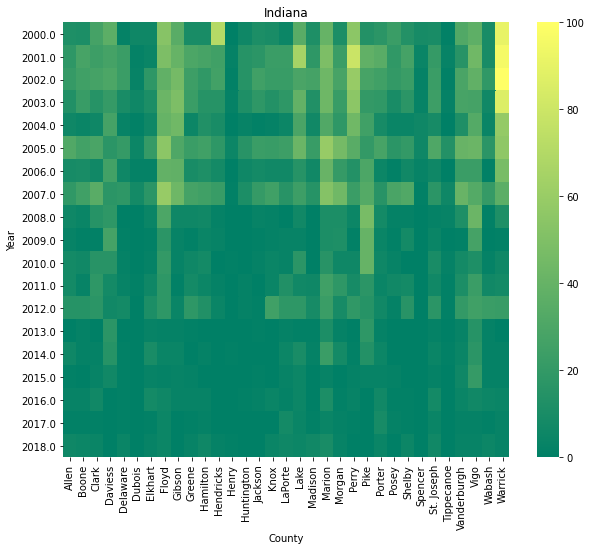

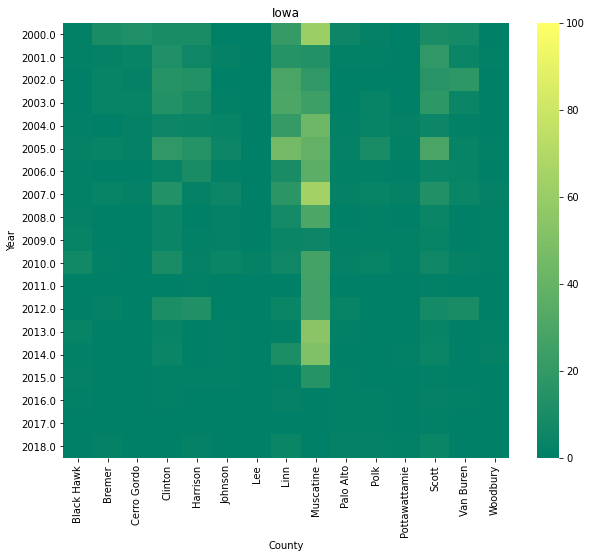

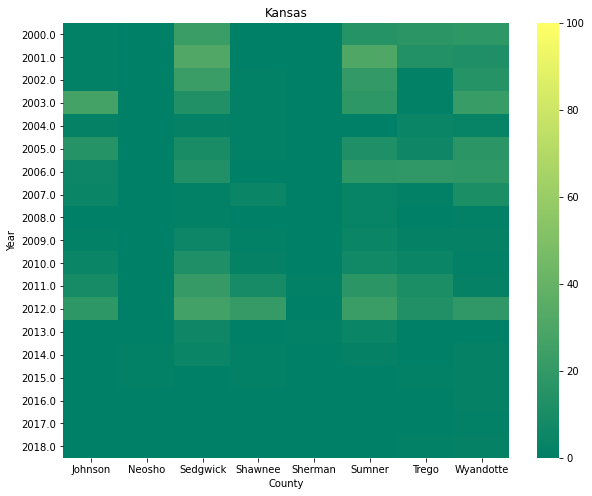

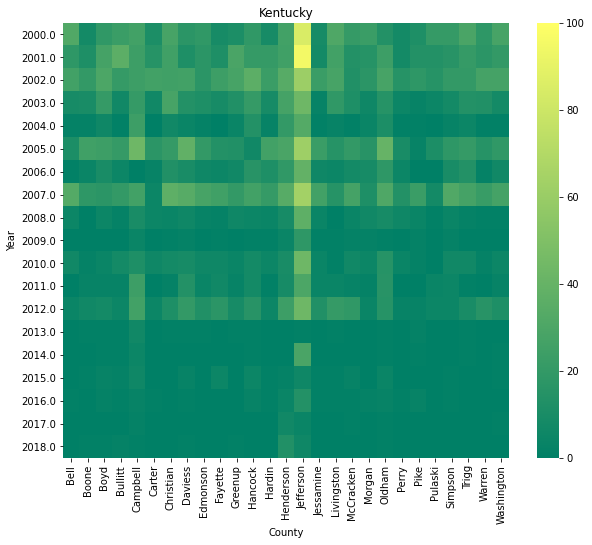

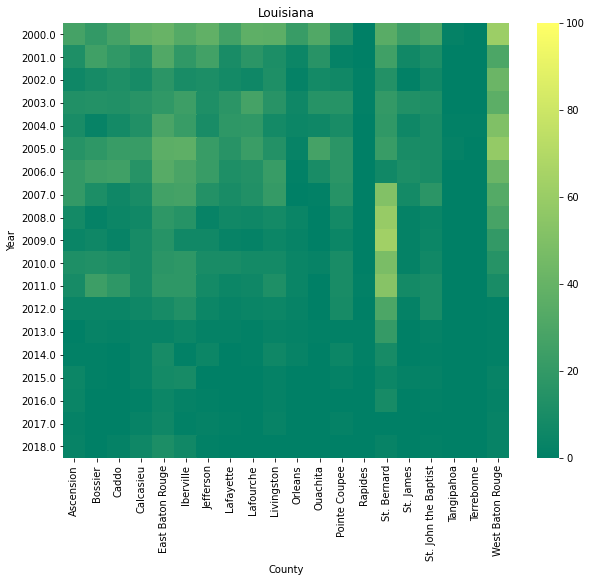

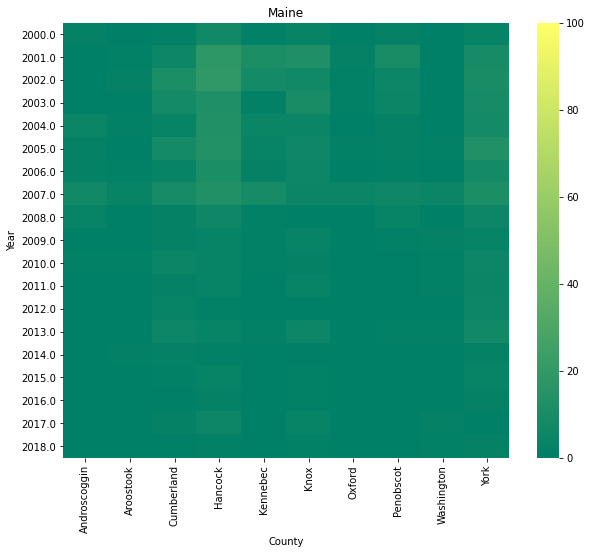

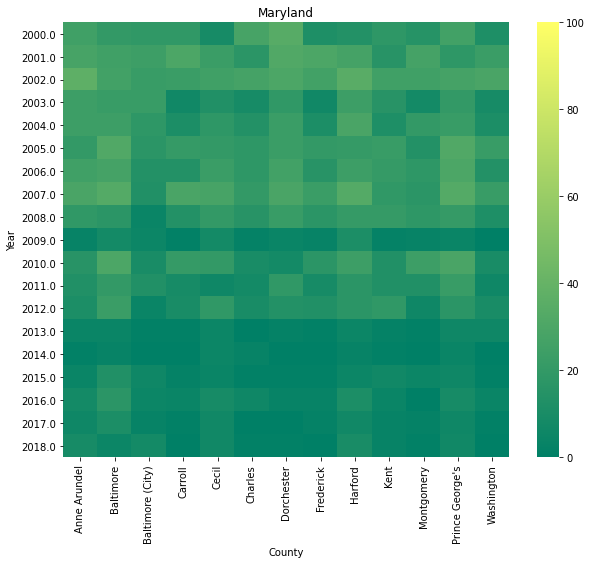

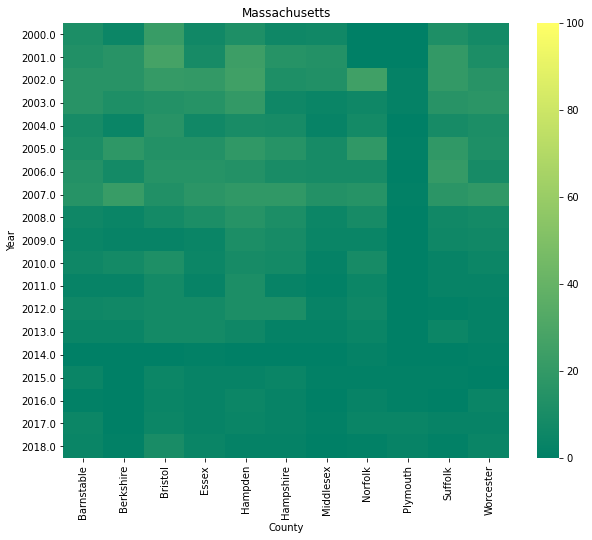

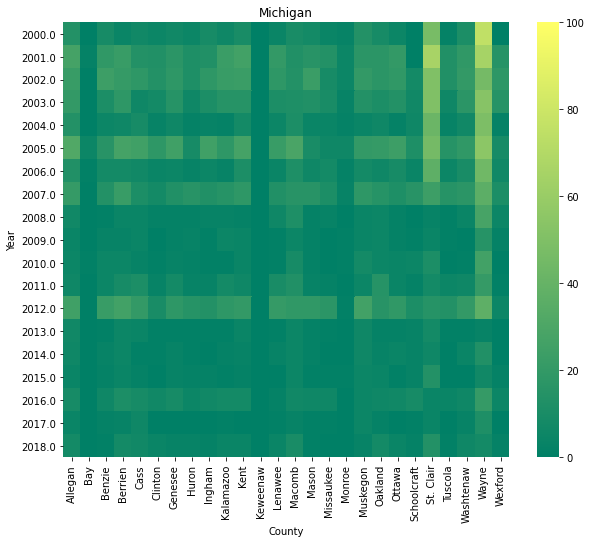

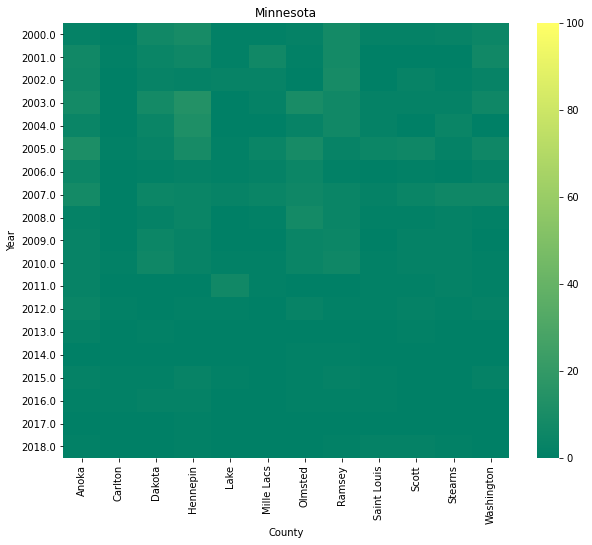

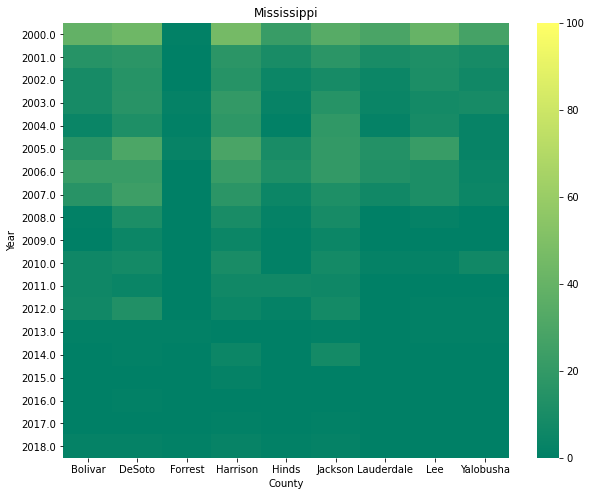

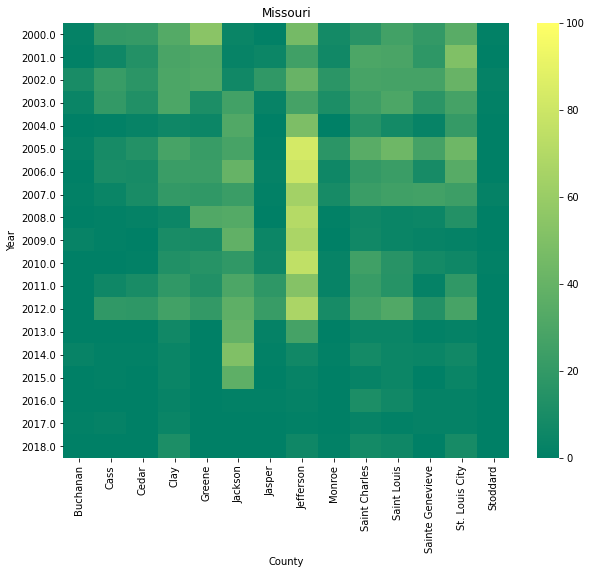

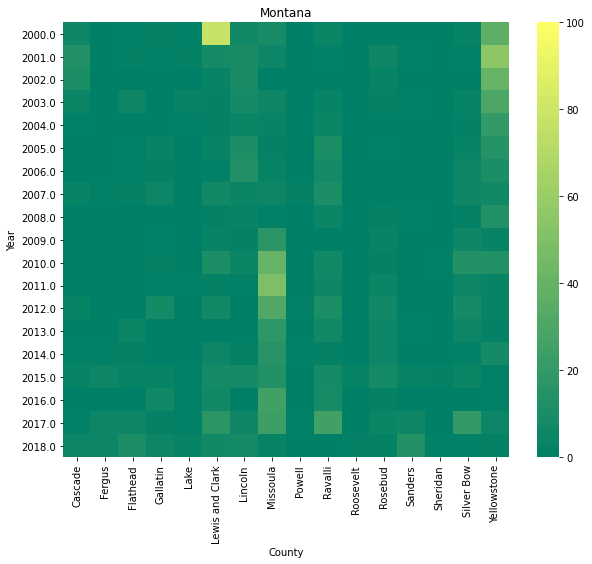

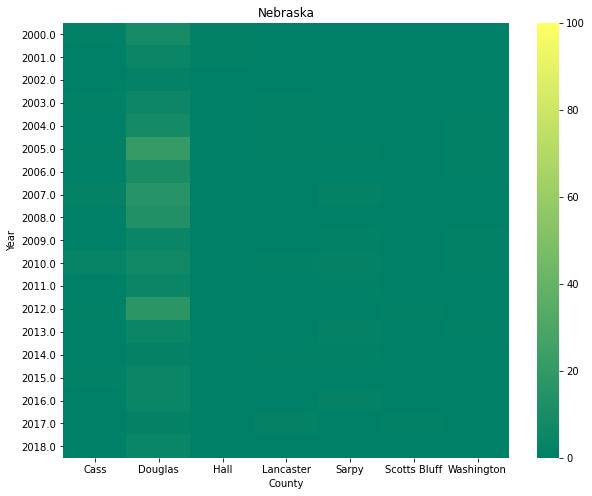

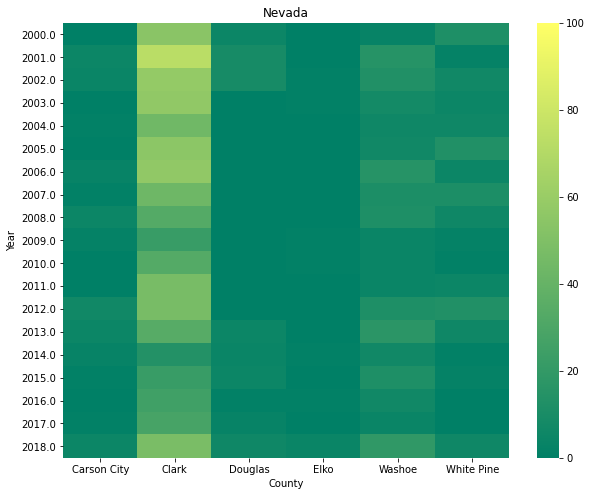

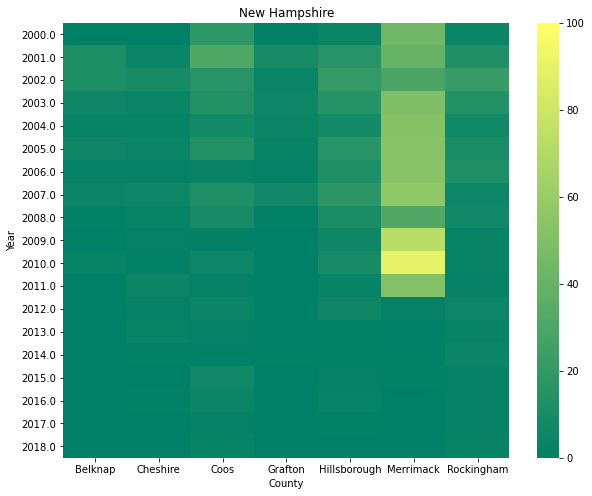

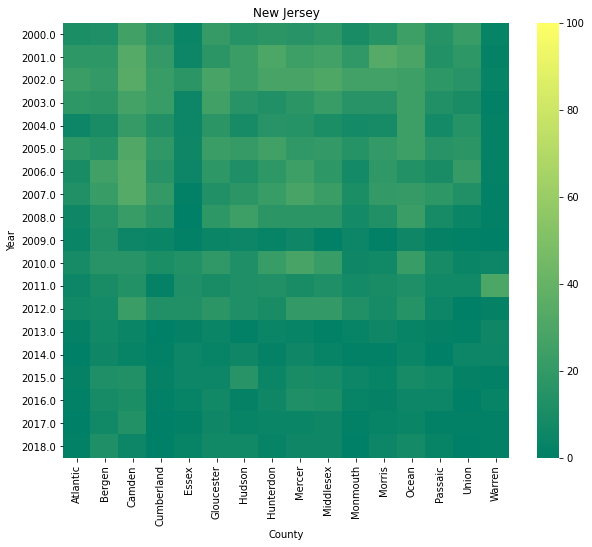

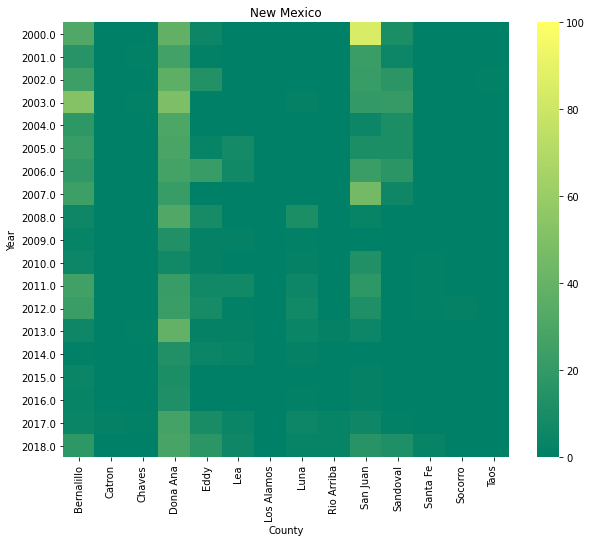

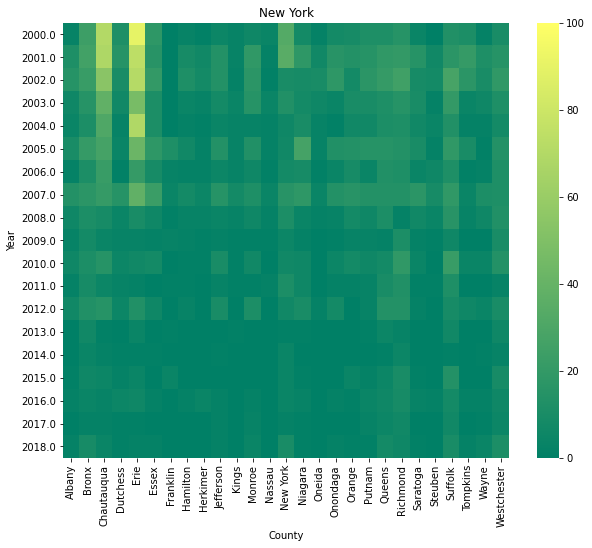

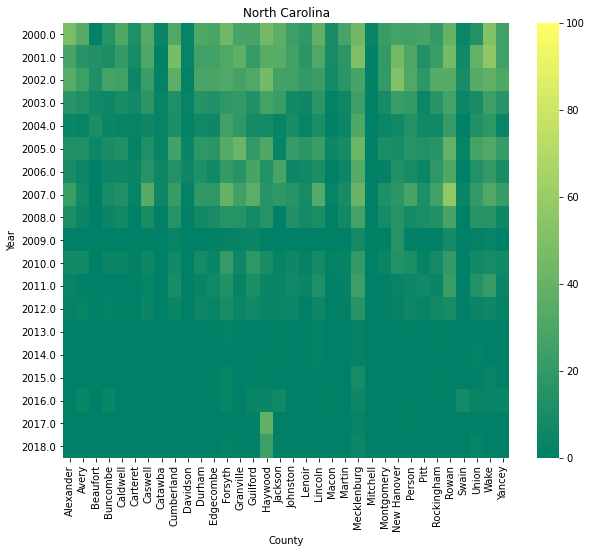

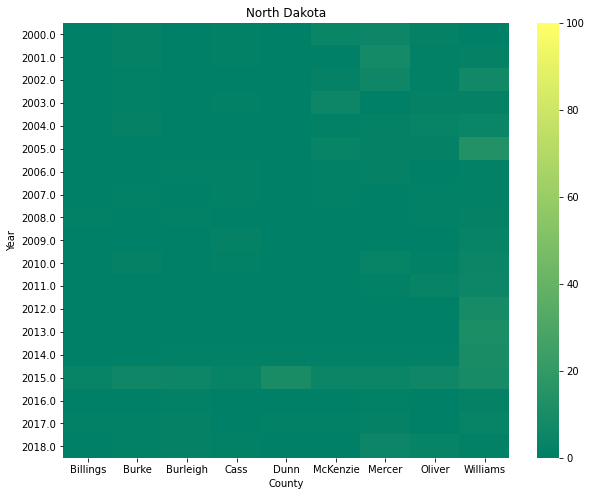

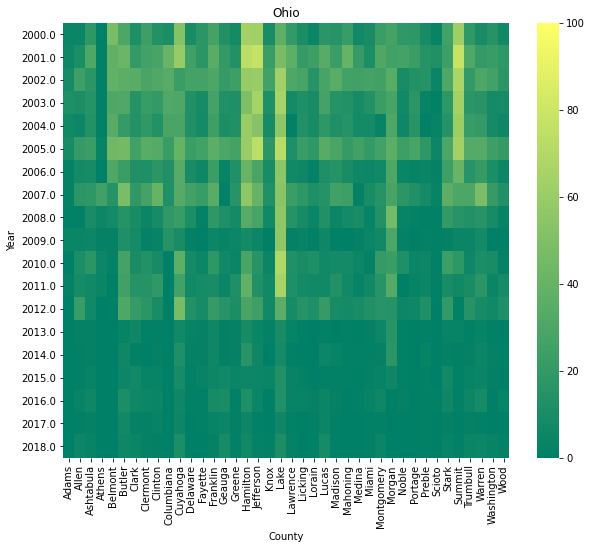

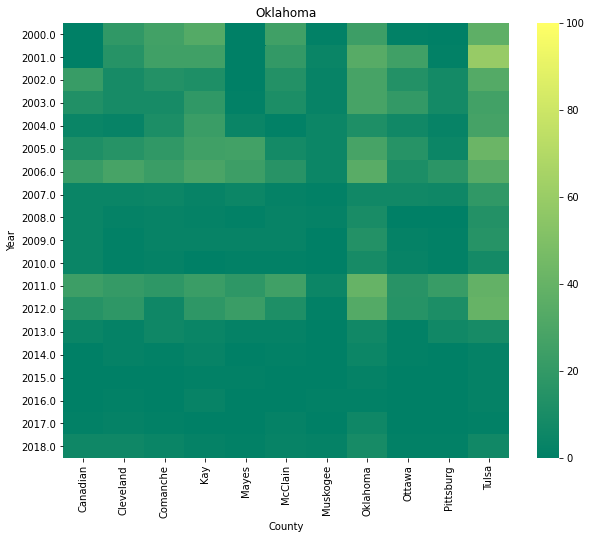

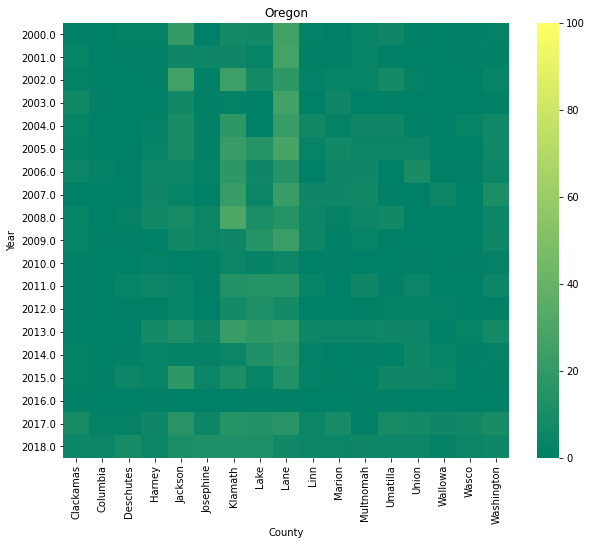

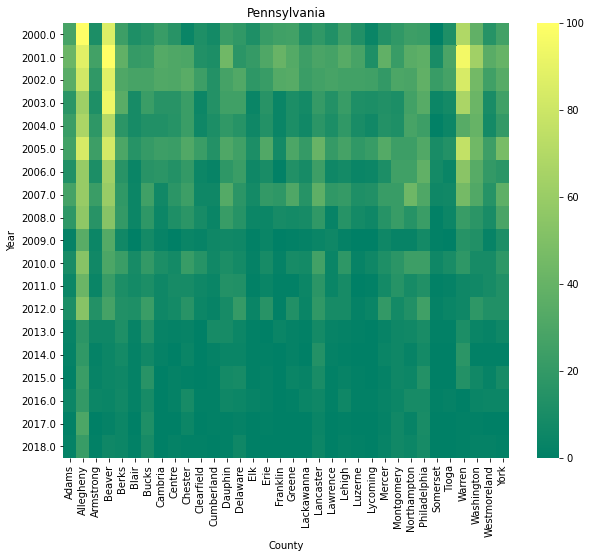

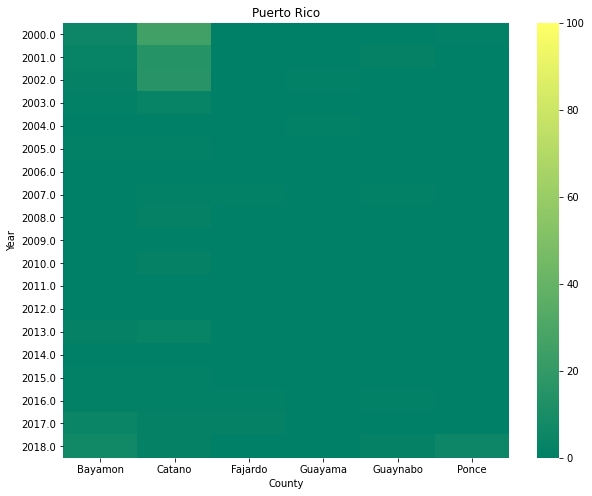

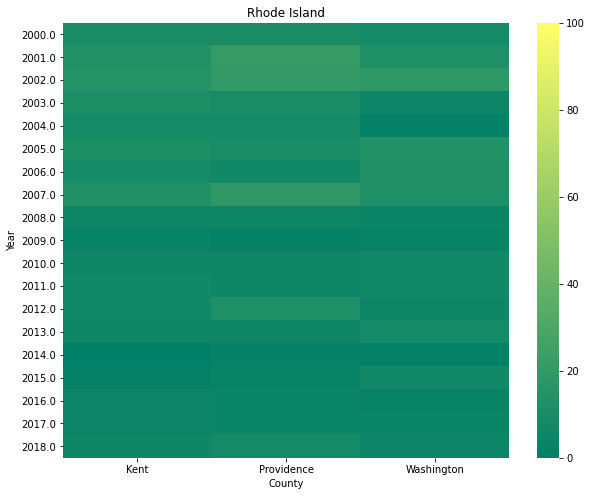

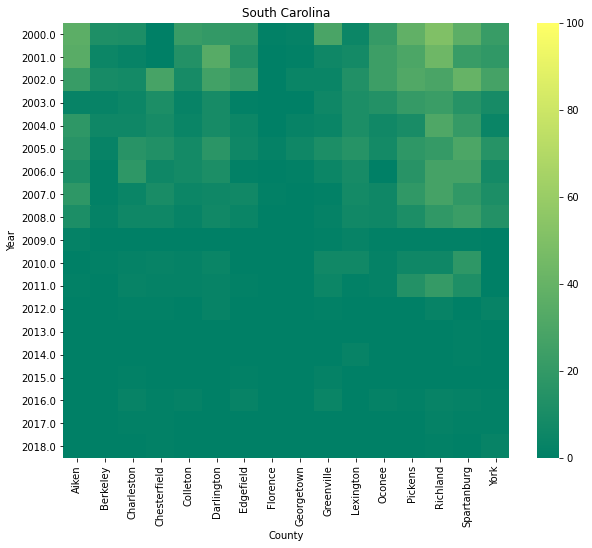

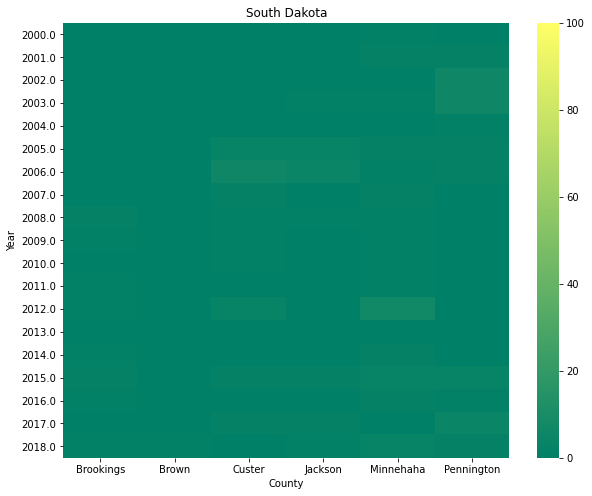

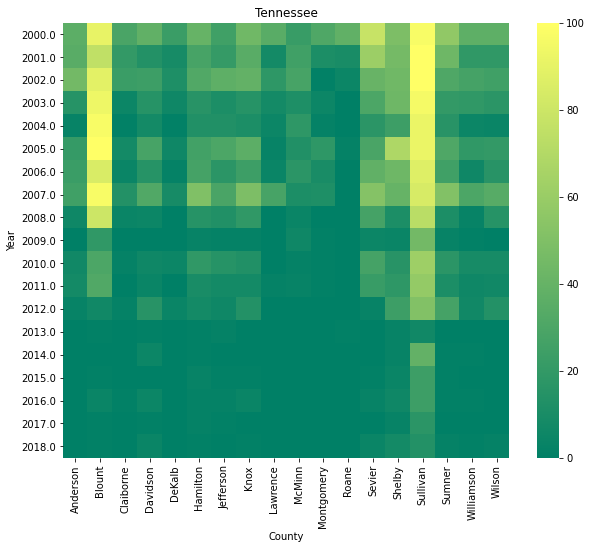

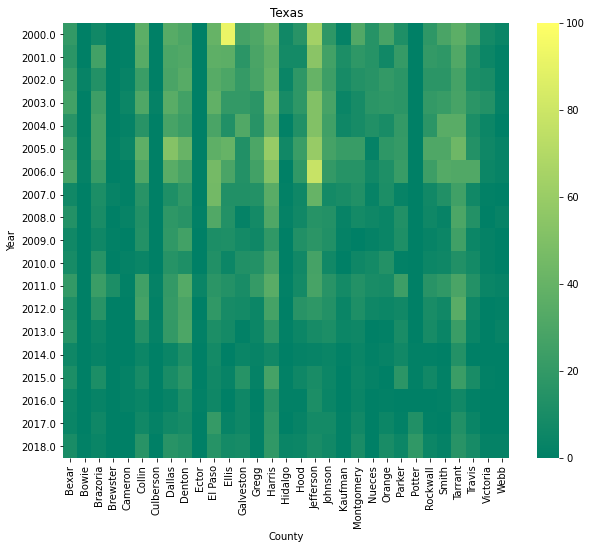

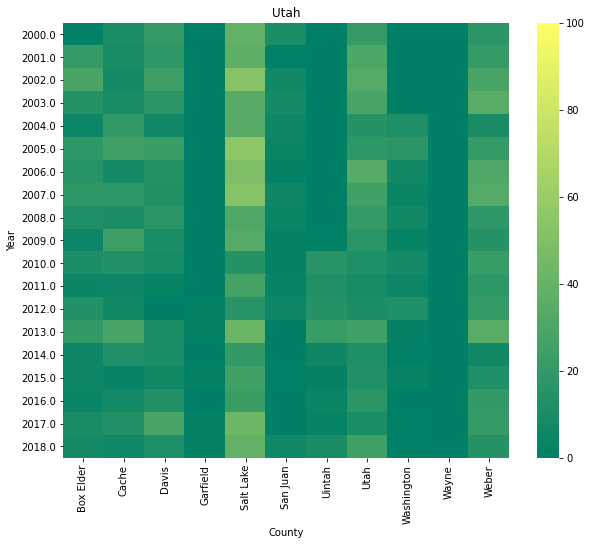

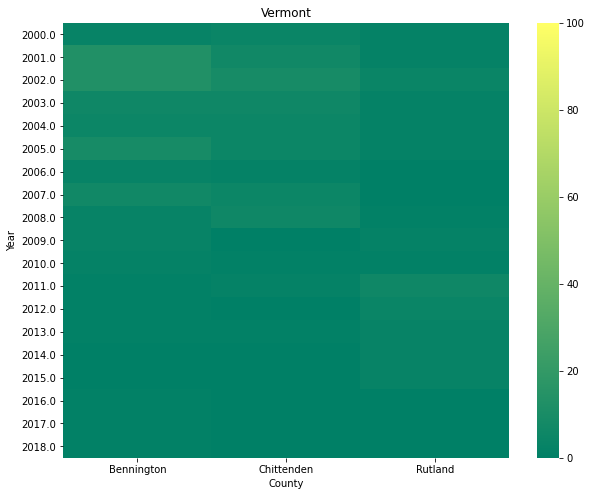

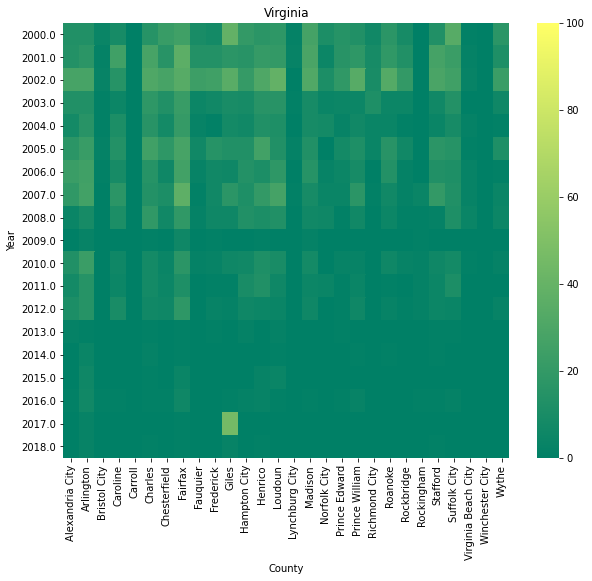

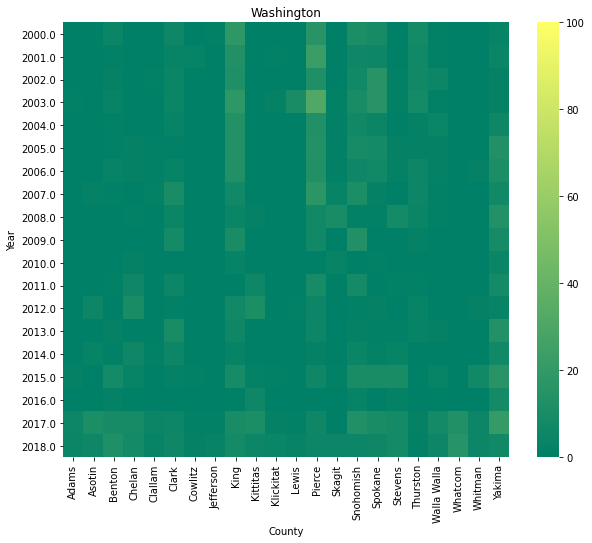

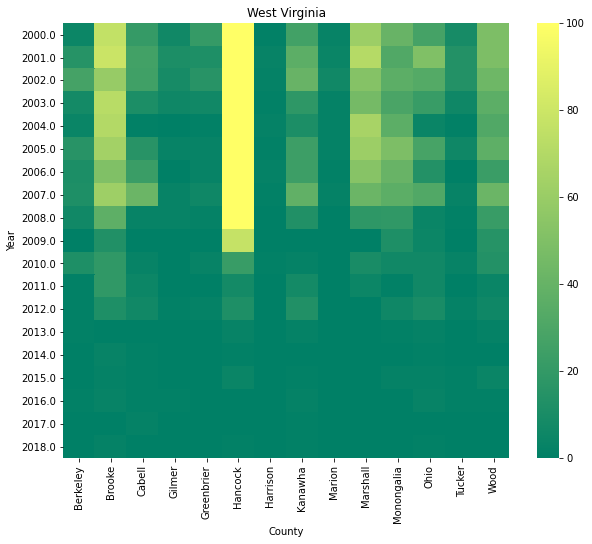

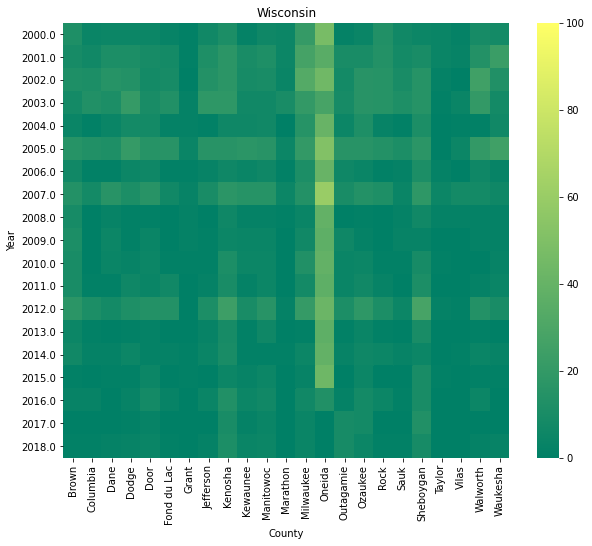

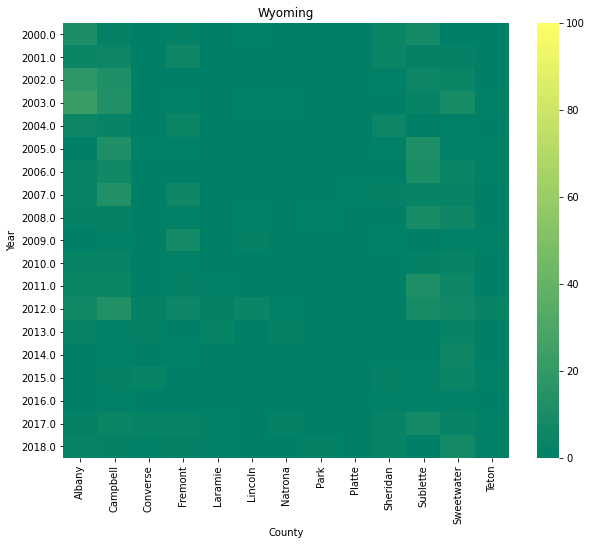

In [0]:
for i in states:
    if i !='Canada'and i !='Country Of Mexico':
        plt.figure(figsize=(10,8))
        sns.heatmap(df[i], label= i, vmin=0, vmax=100, cmap='summer')
        plt.title(i)
        plt.show()

# Particulate matter pollution

In [0]:
dfPM = pd.pivot_table(data,values='Days PM2.5', index='Year', columns=['State', 'County'])
dfPM = dfPM.dropna(axis='columns')
dfPM.head()

State  Alabama                       ...  Wyoming                          
County Baldwin  Clay Colbert DeKalb  ... Sheridan Sublette Sweetwater Teton
Year                                 ...                                   
2000.0    42.0  83.0    98.0   56.0  ...    101.0      1.0        0.0   1.0
2001.0    67.0  72.0    86.0   65.0  ...     90.0      0.0        0.0  17.0
2002.0    81.0  93.0    67.0   71.0  ...     82.0      4.0        0.0  11.0
2003.0    89.0  88.0    79.0   81.0  ...     88.0     29.0        0.0  18.0
2004.0    72.0  93.0    82.0   80.0  ...     77.0      1.0        0.0  20.0

[5 rows x 859 columns]

In [0]:
state_PM_ave = {}
for i in states:
  if i !='Canada'and i !='Country Of Mexico':
    PM_values = []
    for year in range(2000,2019):
      PM_values.append(dfPM.loc[year].mean())
    state_ave_pm[i] = PM_values
state_ave_pm    
State_ave_PM = pd.DataFrame(state_ave_pm)
State_ave_PM.head()

Alabama     Alaska    Arizona  ...  West Virginia  Wisconsin    Wyoming
0  66.263097  66.263097  66.263097  ...      66.263097  66.263097  66.263097
1  69.422584  69.422584  69.422584  ...      69.422584  69.422584  69.422584
2  71.796275  71.796275  71.796275  ...      71.796275  71.796275  71.796275
3  74.293364  74.293364  74.293364  ...      74.293364  74.293364  74.293364
4  83.569267  83.569267  83.569267  ...      83.569267  83.569267  83.569267

[5 rows x 52 columns]

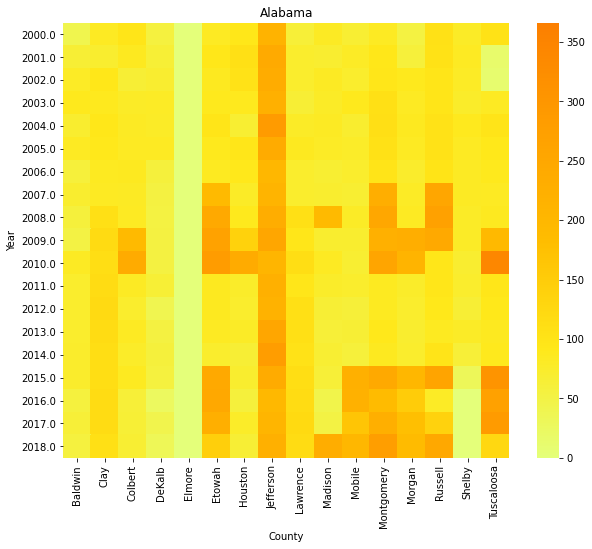

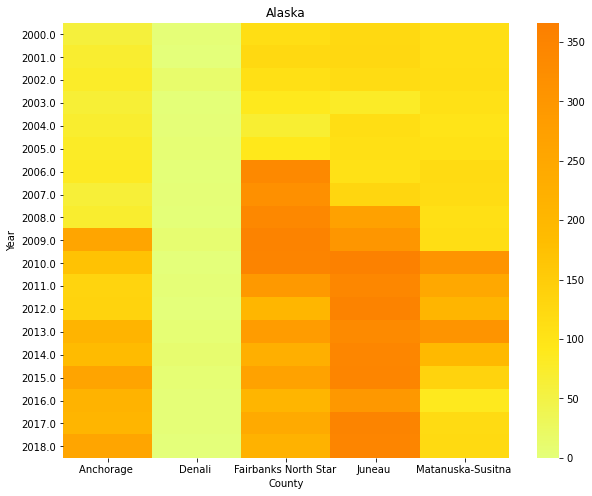

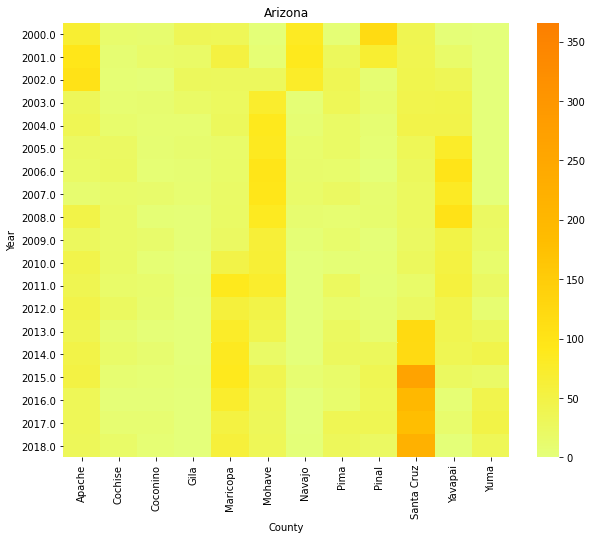

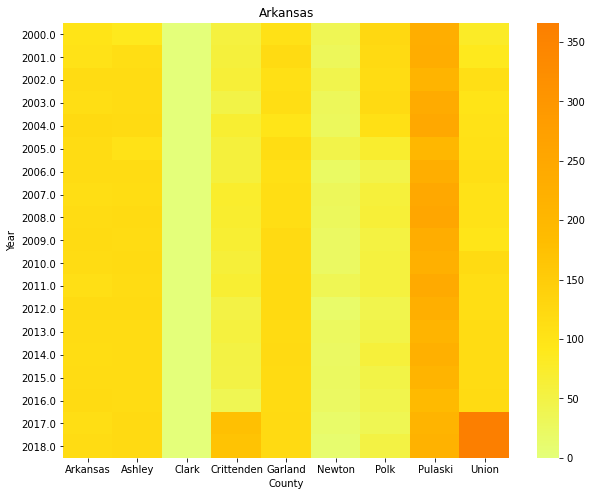

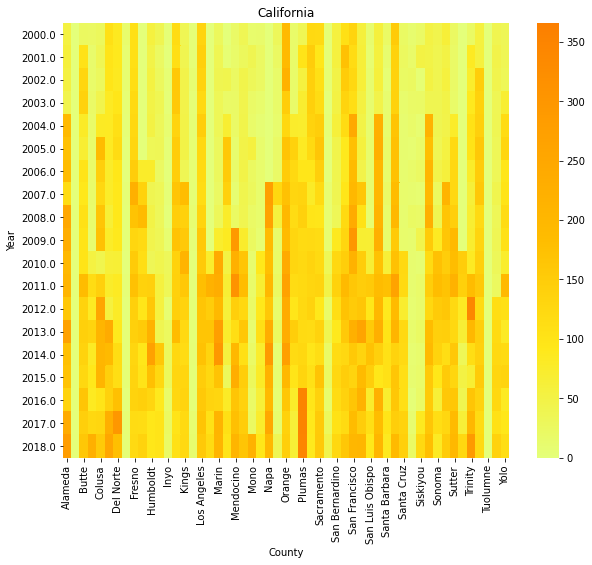

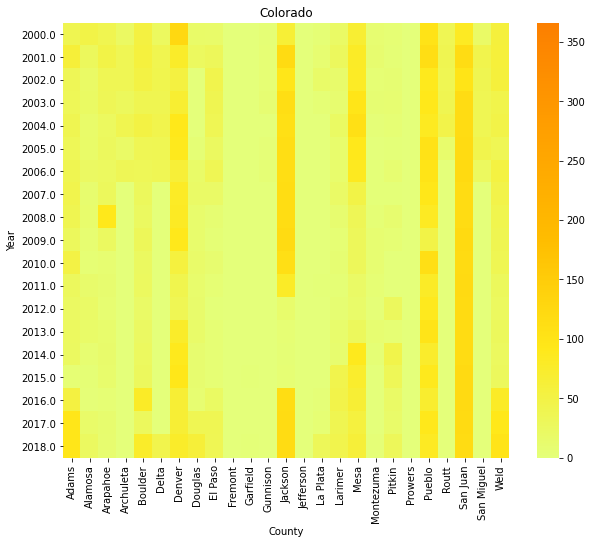

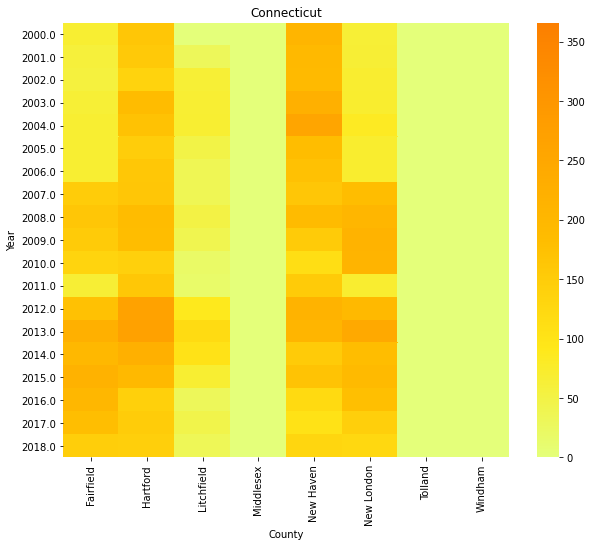

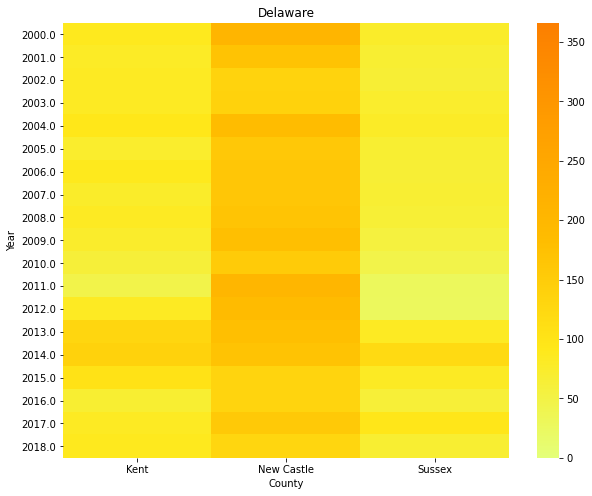

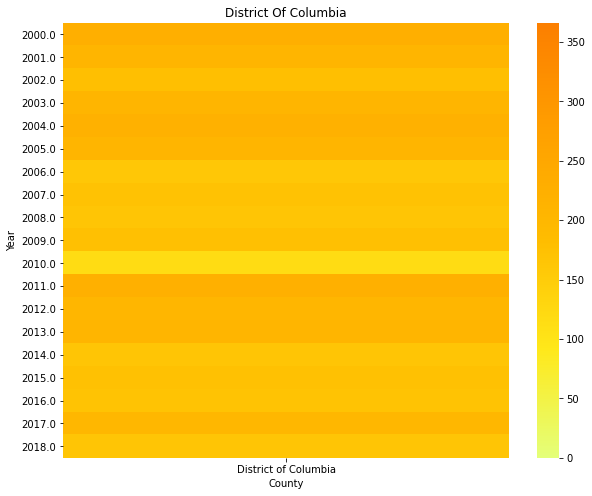

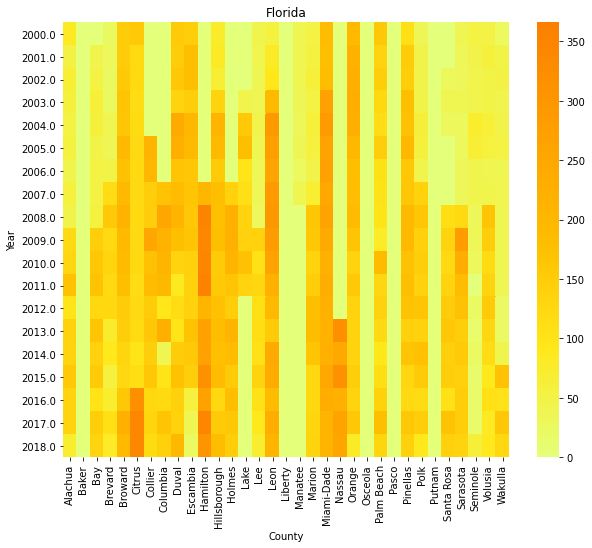

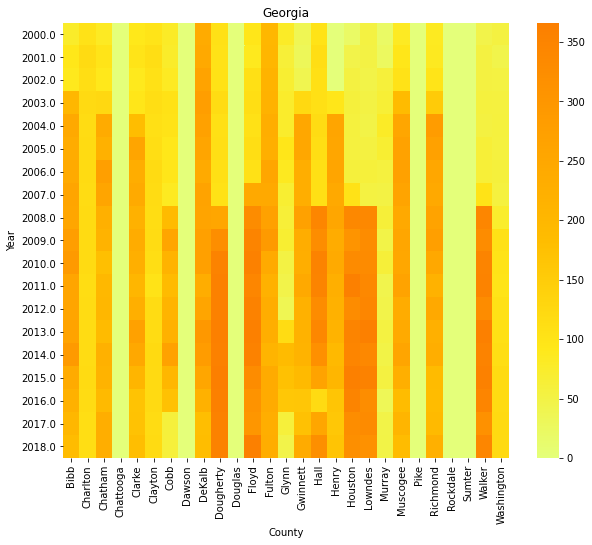

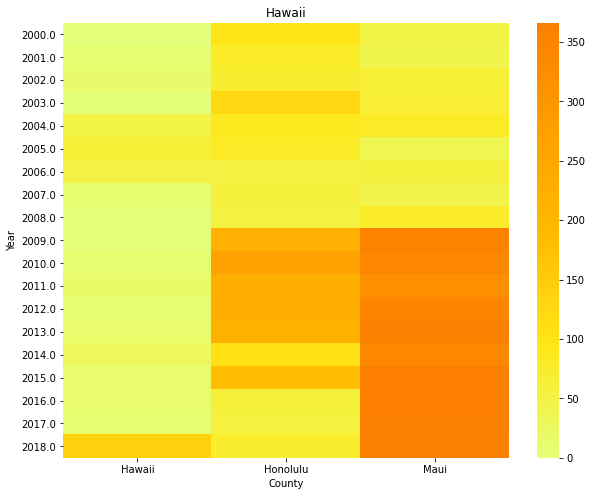

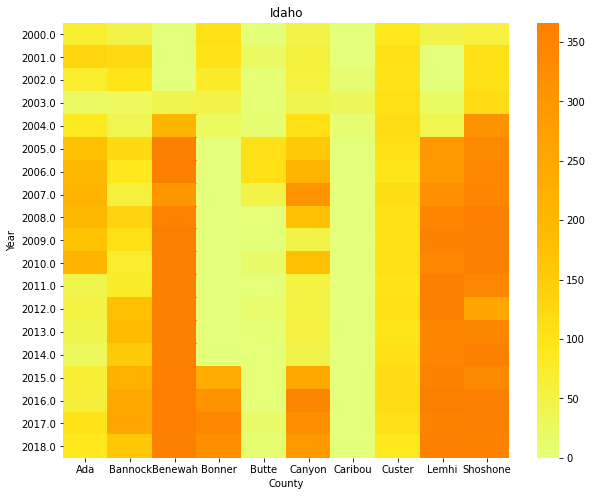

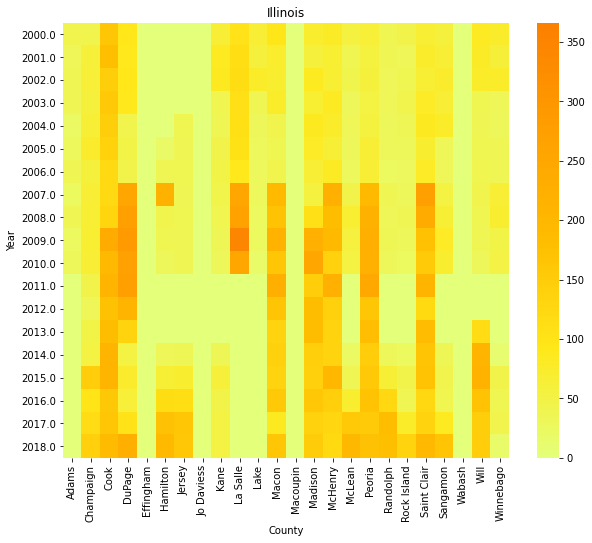

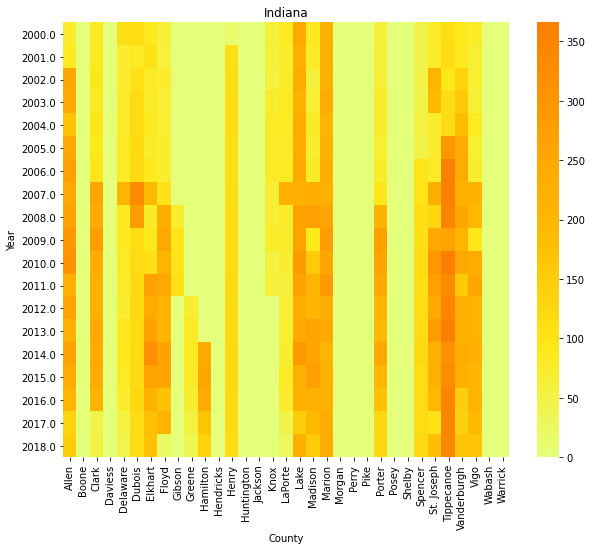

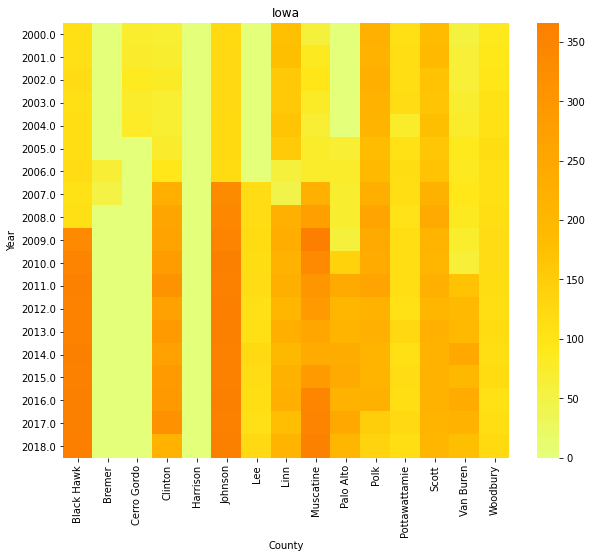

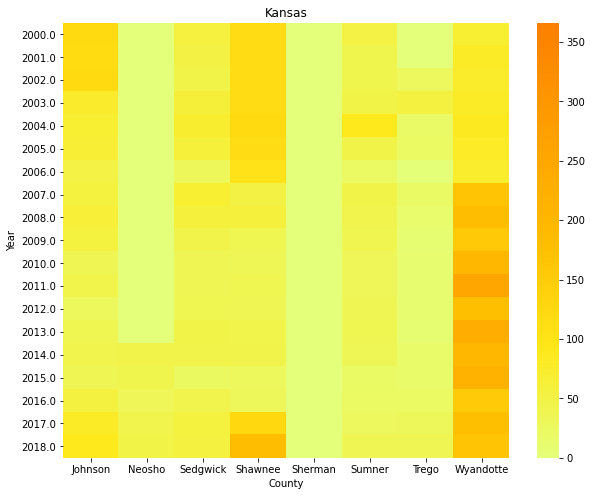

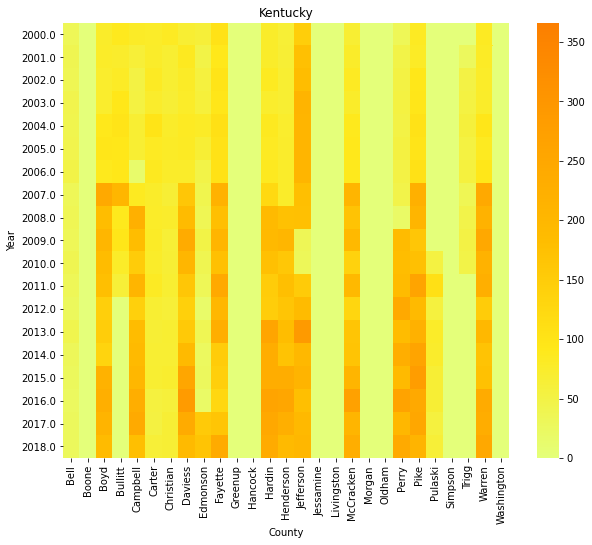

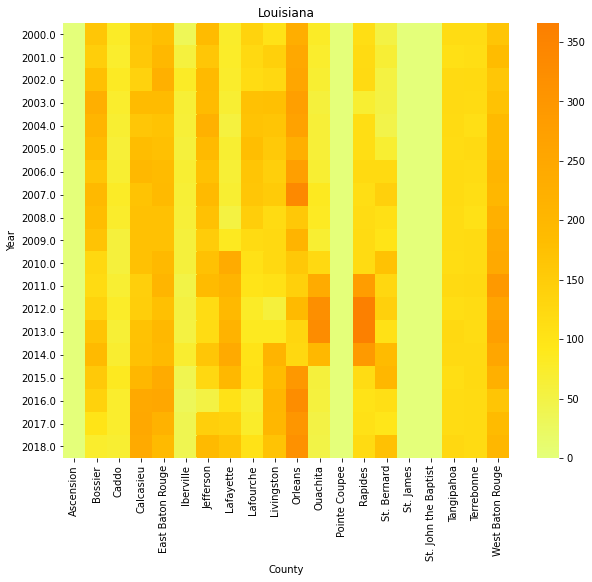

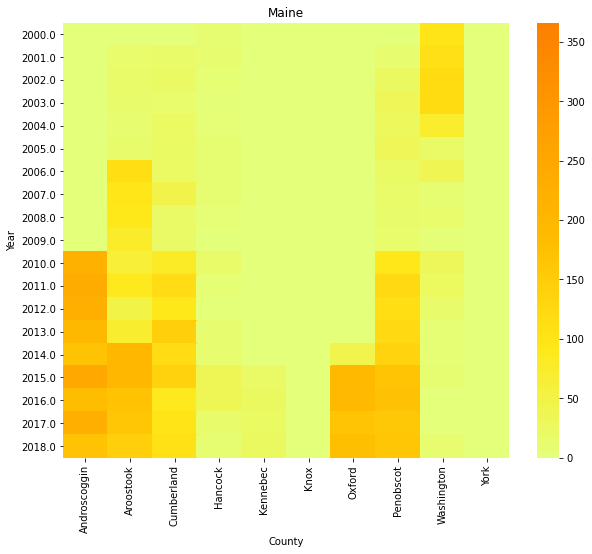

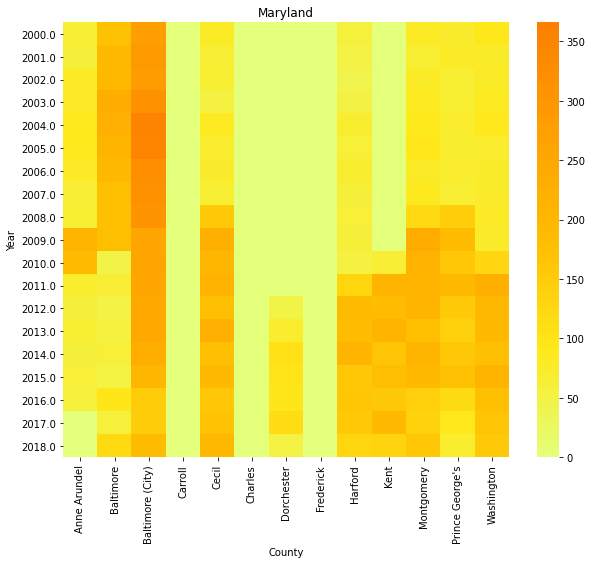

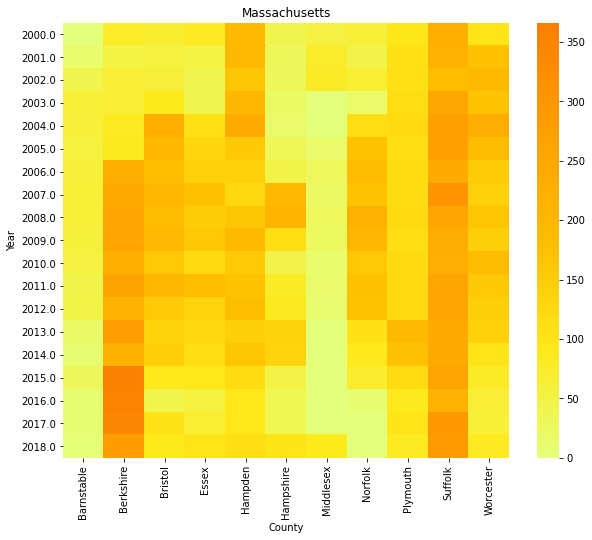

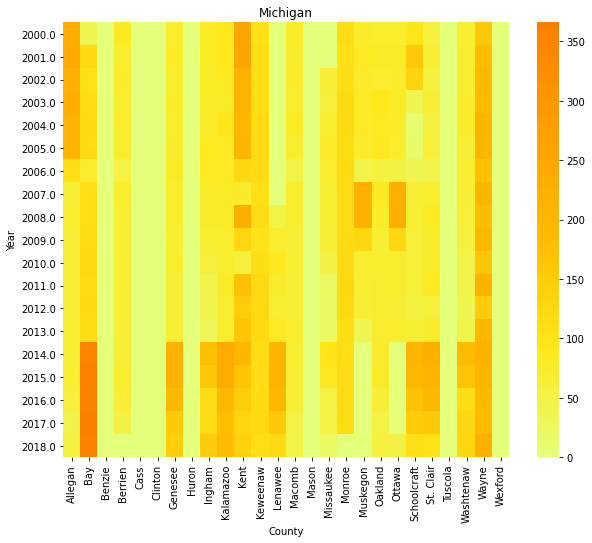

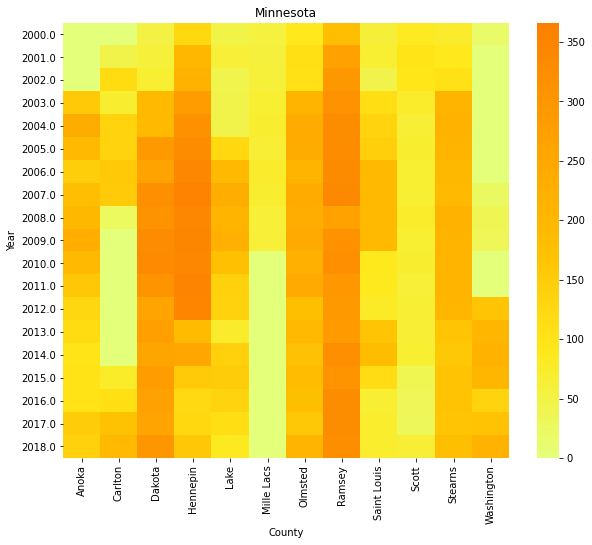

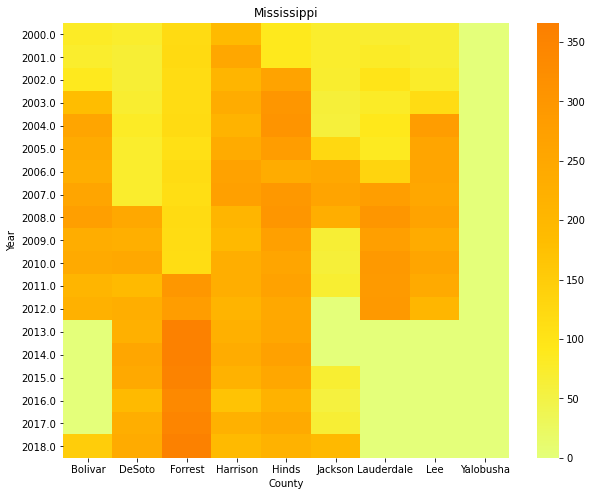

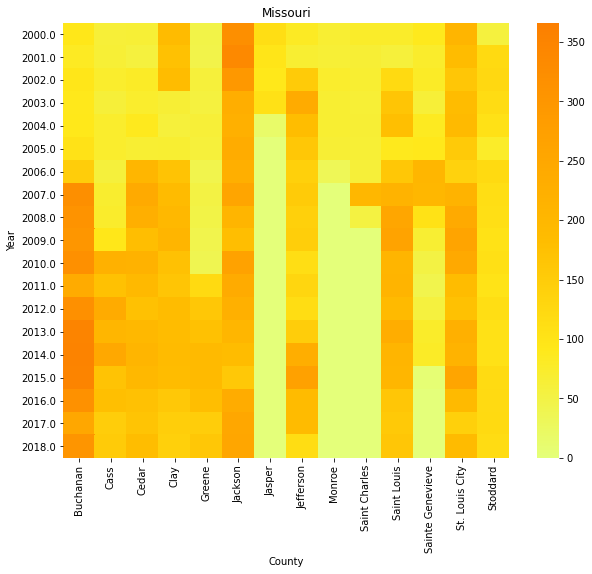

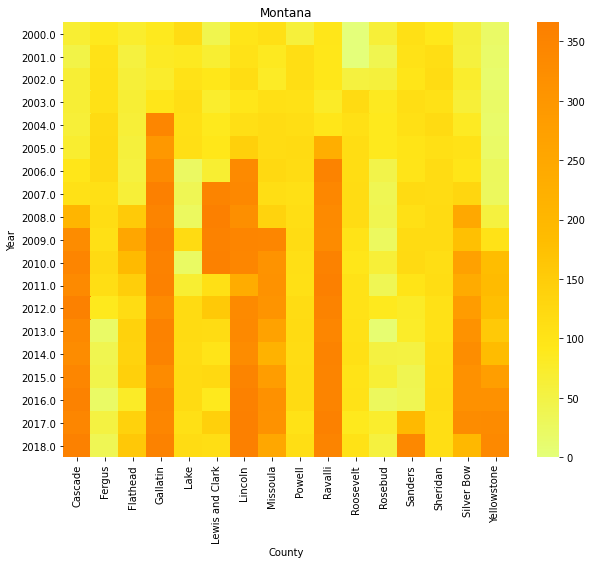

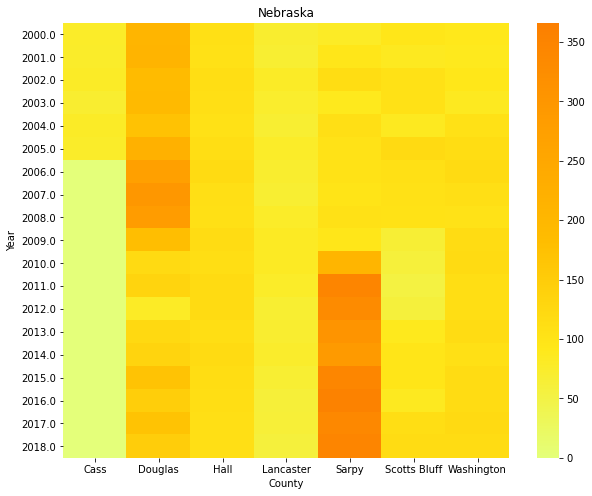

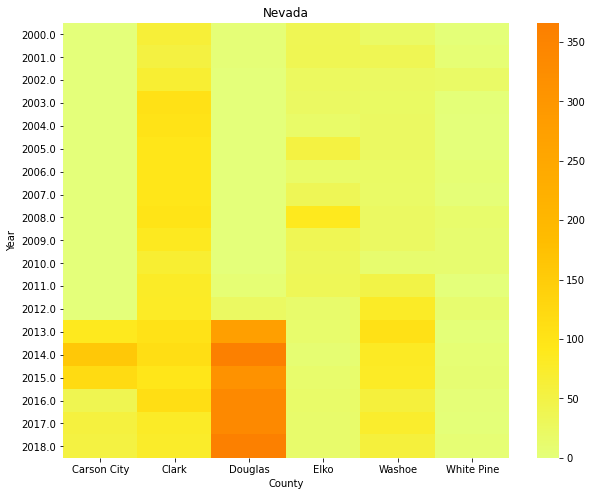

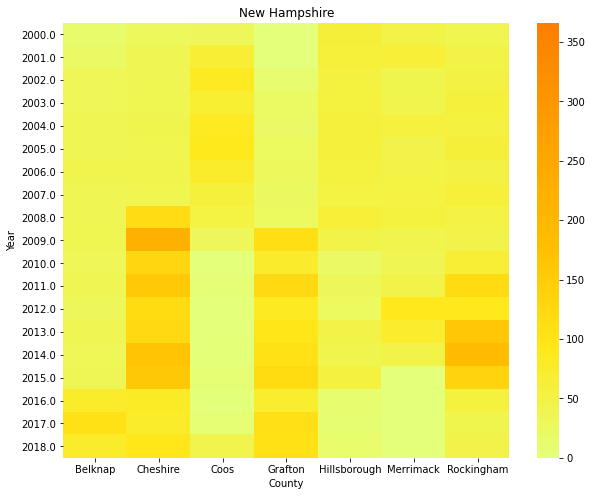

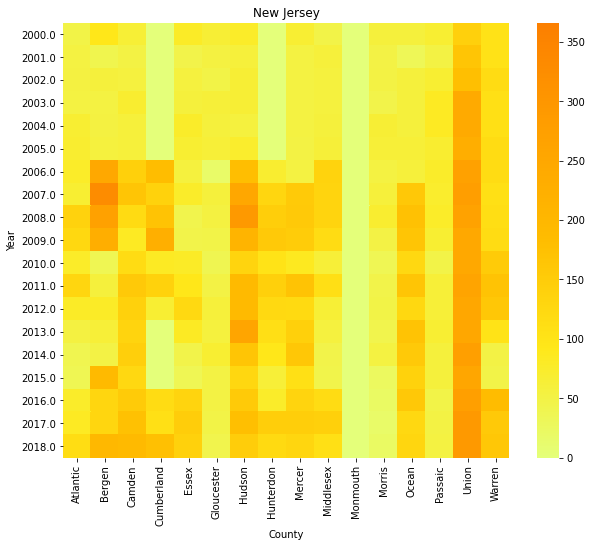

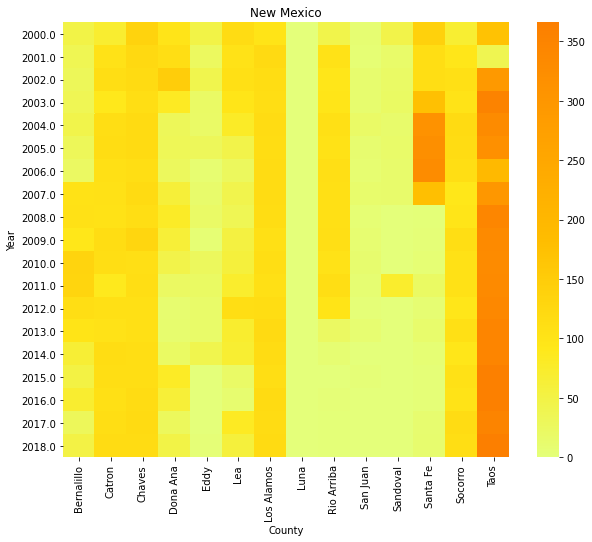

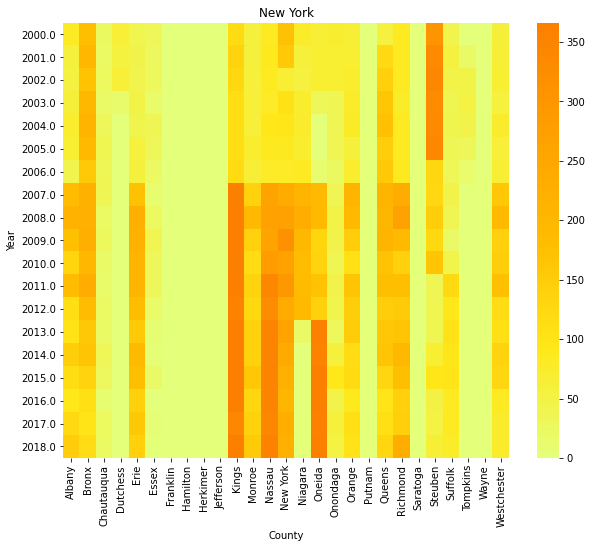

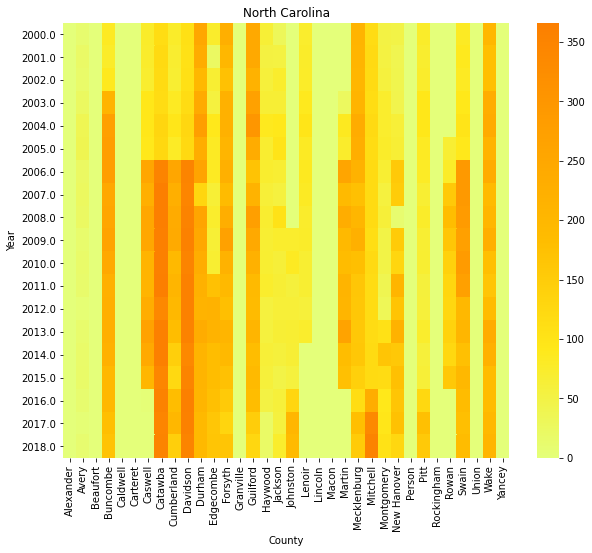

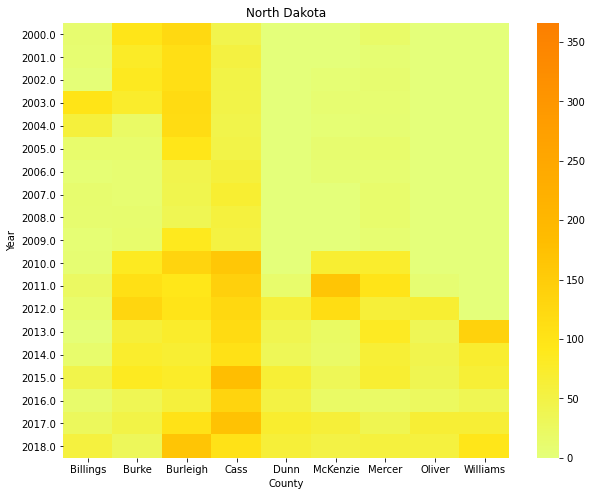

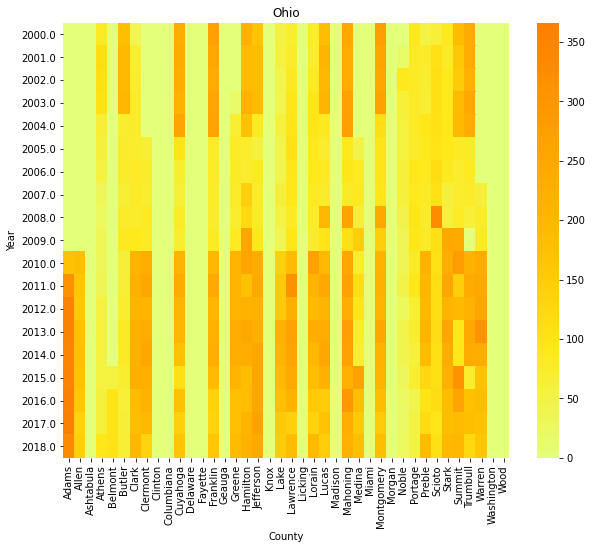

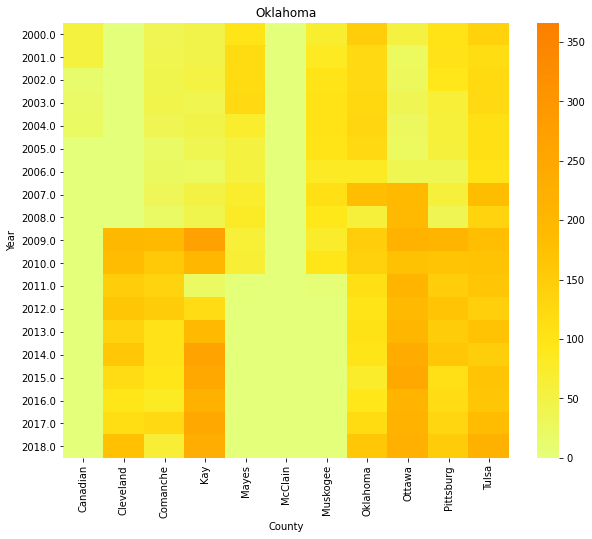

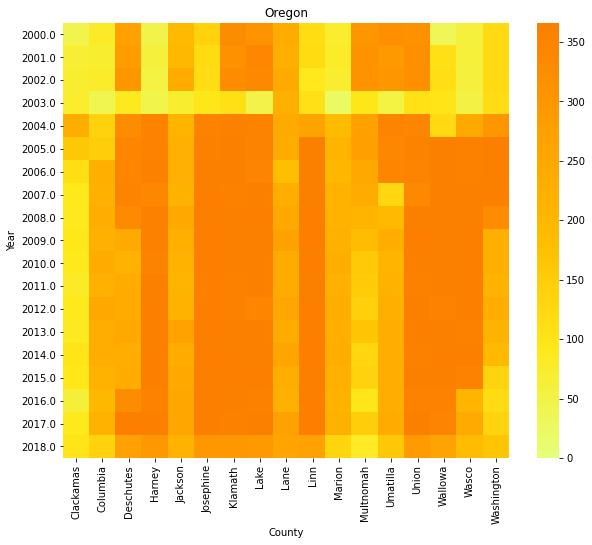

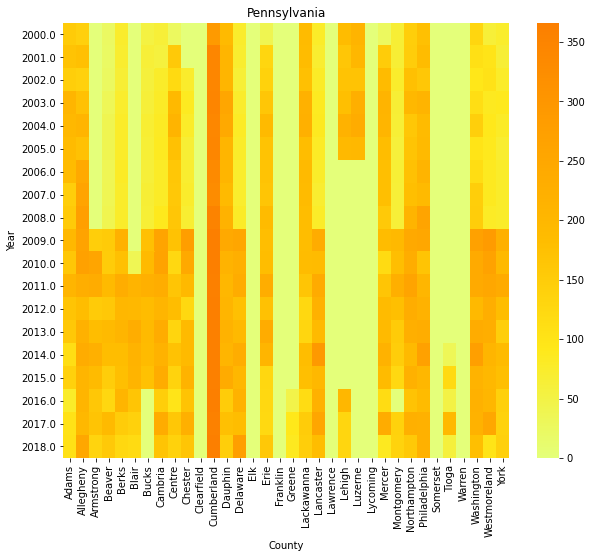

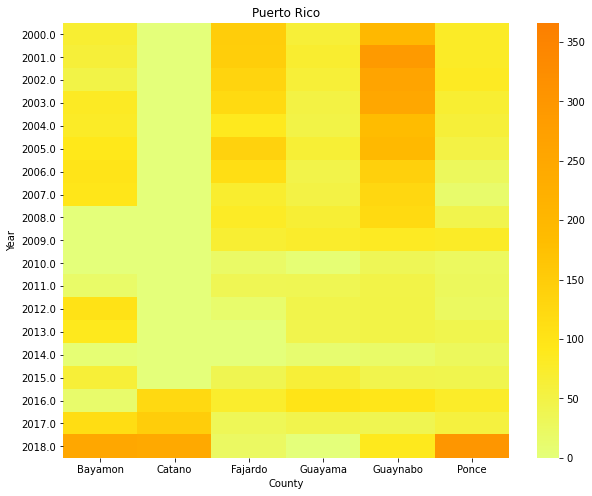

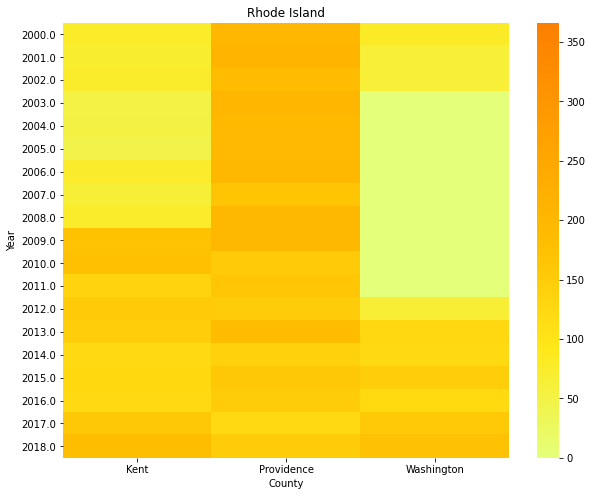

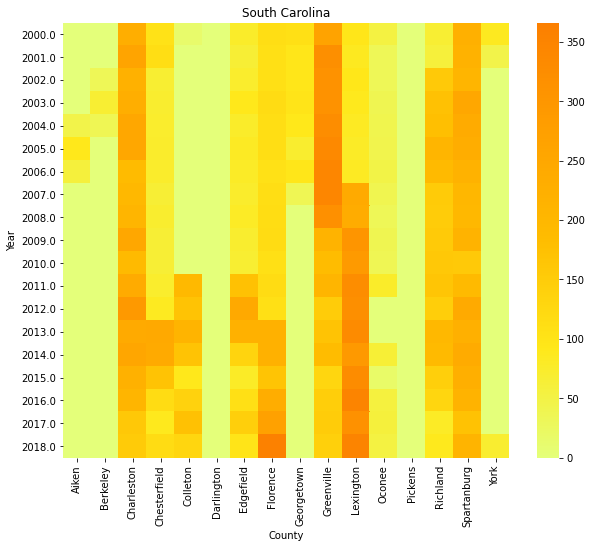

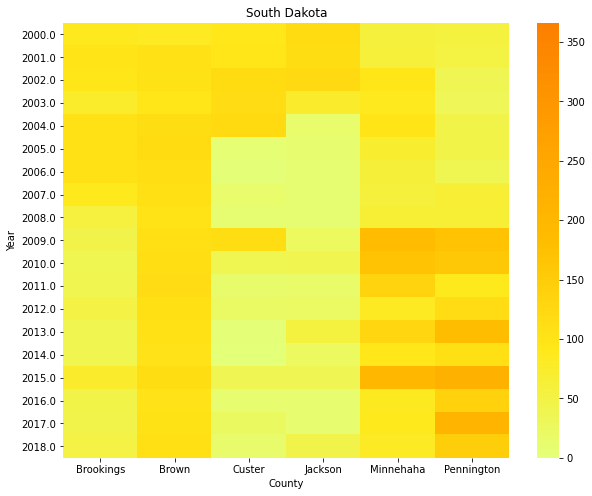

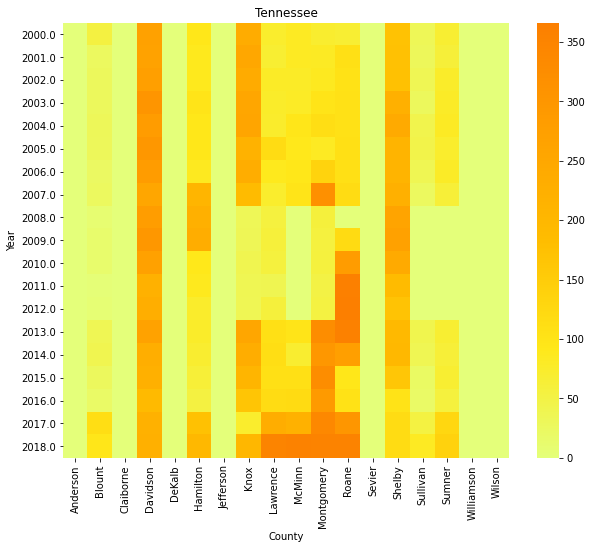

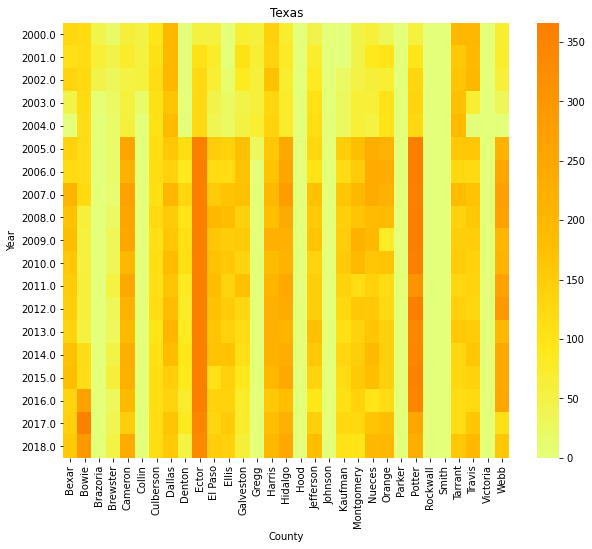

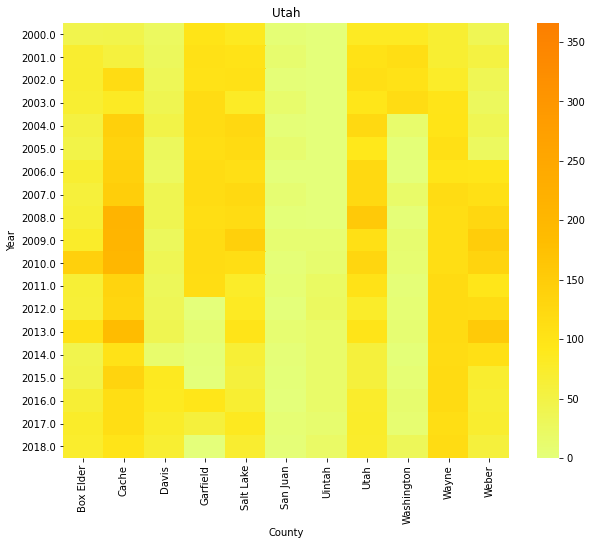

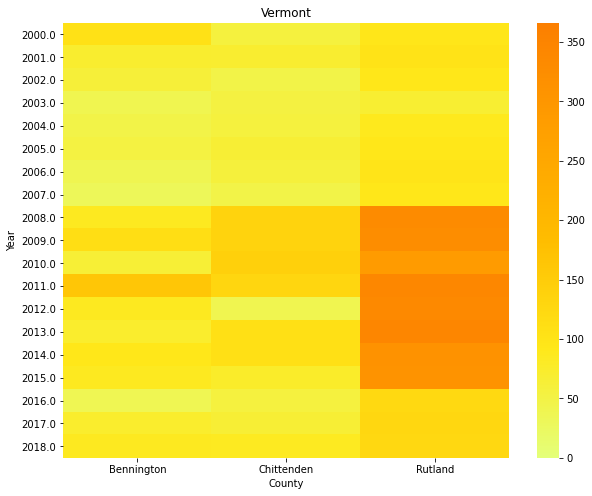

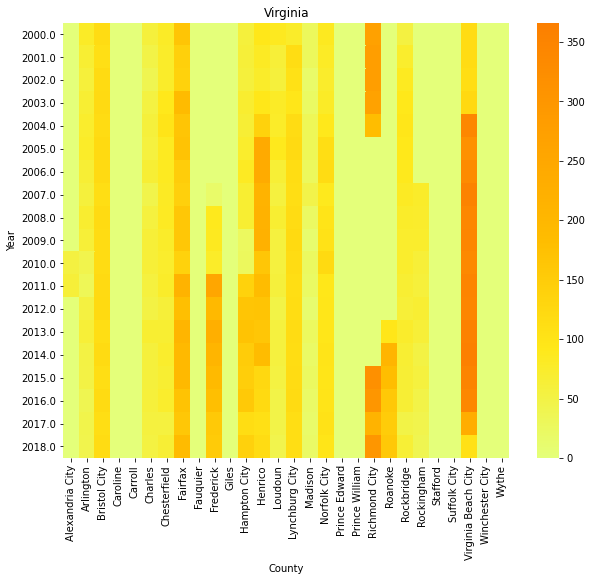

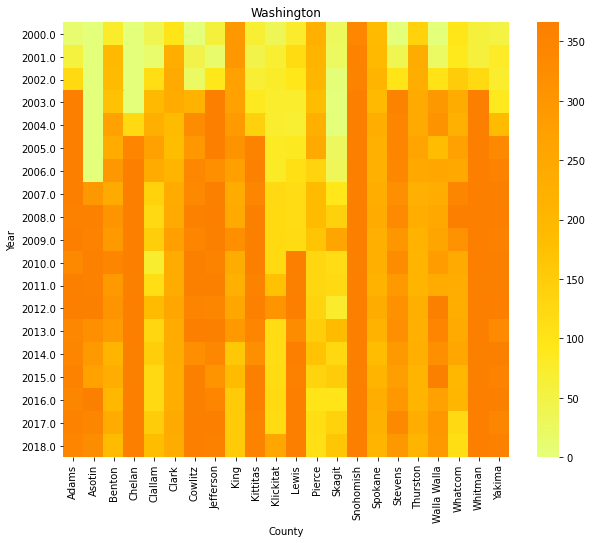

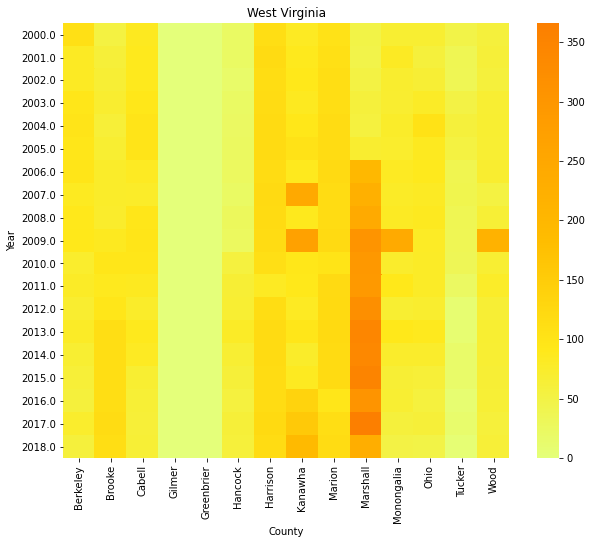

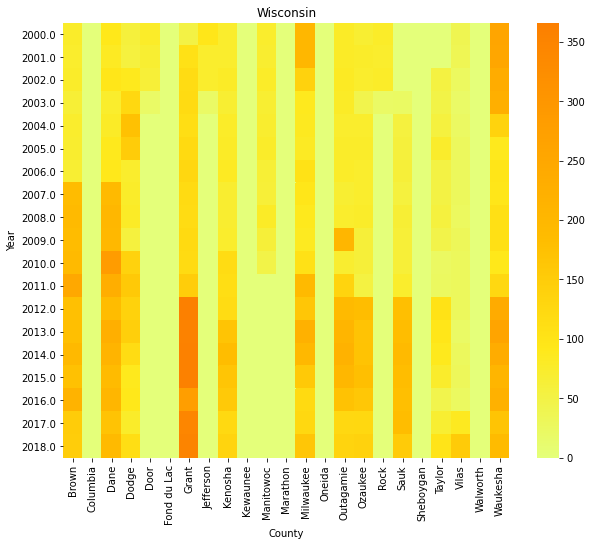

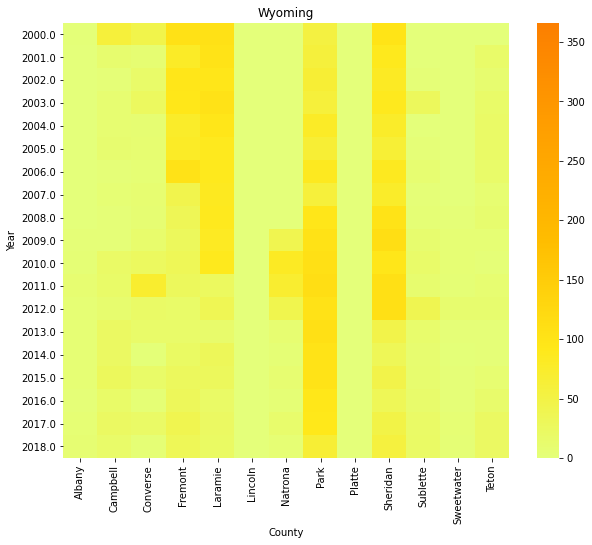

In [0]:
for i in states:
    if i !='Canada'and i !='Country Of Mexico':
        plt.figure(figsize=(10,8))
        sns.heatmap(dfPM[i], label= i, vmin=0, vmax=366, cmap='Wistia')
        plt.title(i)
        plt.show()

In [0]:
data.head(2)

State   County    Year  ...  Unnamed: 4  Unnamed: 5  Unnamed: 6
1055   Wyoming   Weston  2018.0  ...         NaN         NaN         NaN
346   Kentucky  Fayette  2018.0  ...         NaN         NaN         NaN

[2 rows x 26 columns]

# Pollution for a specific county over time

In [0]:
data[data['State']=='Michigan']
data_by_county = data.set_index(['State', 'County'])
MichiganBay=data_by_county.loc['Michigan','Bay']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: PerformanceWarning:

indexing past lexsort depth may impact performance.



In [0]:
MichiganBay = MichiganBay.sort_values(by=['Year'], ascending=True)
MichiganBay.head()

Year  Days with AQI  ...  Unnamed: 5  Unnamed: 6
State    County                         ...                        
Michigan Bay     2000.0           39.0  ...         NaN         NaN
         Bay     2001.0          119.0  ...         NaN         NaN
         Bay     2002.0          105.0  ...         NaN         NaN
         Bay     2003.0          113.0  ...         NaN         NaN
         Bay     2004.0          120.0  ...         NaN         NaN

[5 rows x 24 columns]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: PerformanceWarning:

indexing past lexsort depth may impact performance.



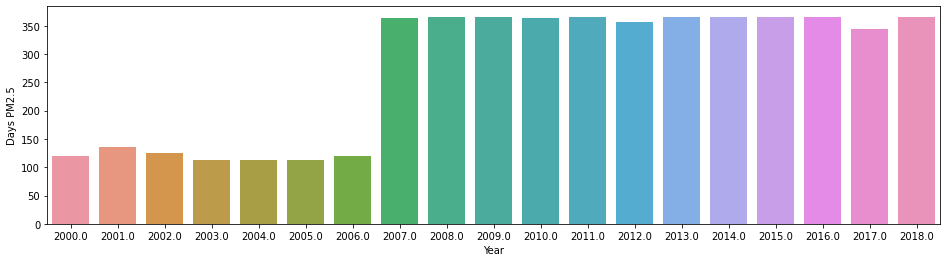

In [0]:
plt.figure(figsize=(16,4))
data[data['State']=='New York' ]
data_by_county = data.set_index(['State', 'County'])
NYKings=data_by_county.loc['New York','Kings']
sns.barplot(x='Year', y='Days PM2.5', data=NYKings)

# choropleth plotting

In [0]:
PMvalues = []
codes = []
for stateCounty in dfPM.columns:
  days = dfPM[stateCounty[0]][stateCounty[1]][2018]
  state = stateCounty[0].lower()
  county = stateCounty[1].lower().strip()
  counties_dict = fips_codes.get(state)
  if counties_dict:
    code = [value for key, value in counties_dict.items() if county in key]
    if len(code)>0:
      codes.append(code[0])
      PMvalues.append(days)
print(len(PMvalues), len(codes))

849 849


In [0]:
pal = sns.color_palette("Reds", 278)
fig = ff.create_choropleth(fips=codes, values=PMvalues, colorscale= pal.as_hex(),legend_title='High PM 2.5 Days', title= 'Year 2018')
fig.layout.template = None
fig.show()